In [1]:
import numpy as np   
import pandas as pd    
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt   
import matplotlib.style

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pylab
import scipy.stats as stats
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

## 1.1 Read the data and do exploratory data analysis. Describe the data briefly. (Check the Data types, shape, EDA, 5 point summary). Perform Univariate, Bivariate Analysis, Multivariate Analysis.

#### Reading the data.

In [2]:
df=pd.read_excel('compactiv.xlsx')

In [3]:
df.head()

lread  lwrite  scall  sread  swrite  fork  exec    rchar    wchar  pgout  \
0      1       0   2147     79      68   0.2   0.2  40671.0  53995.0    0.0   
1      0       0    170     18      21   0.2   0.2    448.0   8385.0    0.0   
2     15       3   2162    159     119   2.0   2.4      NaN  31950.0    0.0   
3      0       0    160     12      16   0.2   0.2      NaN   8670.0    0.0   
4      5       1    330     39      38   0.4   0.4      NaN  12185.0    0.0   

   ...  pgscan  atch  pgin  ppgin    pflt    vflt         runqsz  freemem  \
0  ...     0.0   0.0   1.6    2.6   16.00   26.40      CPU_Bound     4670   
1  ...     0.0   0.0   0.0    0.0   15.63   16.83  Not_CPU_Bound     7278   
2  ...     0.0   1.2   6.0    9.4  150.20  220.20  Not_CPU_Bound      702   
3  ...     0.0   0.0   0.2    0.2   15.60   16.80  Not_CPU_Bound     7248   
4  ...     0.0   0.0   1.0    1.2   37.80   47.60  Not_CPU_Bound      633   

  freeswap  usr  
0  1730946   95  
1  1869002   97  
2  1021237   87  
3  1863704   98  
4  1760253   90  

[5 rows x 22 columns]

In [4]:
df.tail()

lread  lwrite  scall  sread  swrite  fork  exec     rchar    wchar  \
8187     16      12   3009    360     244   1.6  5.81  405250.0  85282.0   
8188      4       0   1596    170     146   2.4  1.80   89489.0  41764.0   
8189     16       5   3116    289     190   0.6  0.60  325948.0  52640.0   
8190     32      45   5180    254     179   1.2  1.20   62571.0  29505.0   
8191      2       0    985     55      46   1.6  4.80  111111.0  22256.0   

      pgout  ...  pgscan  atch   pgin  ppgin    pflt    vflt         runqsz  \
8187   8.02  ...   55.11   0.6  35.87  47.90  139.28  270.74      CPU_Bound   
8188   3.80  ...    0.20   0.8   3.80   4.40  122.40  212.60  Not_CPU_Bound   
8189   0.40  ...    0.00   0.4  28.40  45.20   60.20  219.80  Not_CPU_Bound   
8190   1.40  ...   18.04   0.4  23.05  24.25   93.19  202.81      CPU_Bound   
8191   0.00  ...    0.00   0.2   3.40   6.20   91.80  110.00      CPU_Bound   

      freemem freeswap  usr  
8187      387   986647   80  
8188      263  1055742   90  
8189      400   969106   87  
8190      141  1022458   83  
8191      659  1756514   94  

[5 rows x 22 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   lread     8192 non-null   int64  
 1   lwrite    8192 non-null   int64  
 2   scall     8192 non-null   int64  
 3   sread     8192 non-null   int64  
 4   swrite    8192 non-null   int64  
 5   fork      8192 non-null   float64
 6   exec      8192 non-null   float64
 7   rchar     8088 non-null   float64
 8   wchar     8177 non-null   float64
 9   pgout     8192 non-null   float64
 10  ppgout    8192 non-null   float64
 11  pgfree    8192 non-null   float64
 12  pgscan    8192 non-null   float64
 13  atch      8192 non-null   float64
 14  pgin      8192 non-null   float64
 15  ppgin     8192 non-null   float64
 16  pflt      8192 non-null   float64
 17  vflt      8192 non-null   float64
 18  runqsz    8192 non-null   object 
 19  freemem   8192 non-null   int64  
 20  freeswap  8192 non-null   int6

In [6]:
df.describe(include='all').T

count unique            top  freq            mean            std  \
lread     8192.0    NaN            NaN   NaN       19.559692      53.353799   
lwrite    8192.0    NaN            NaN   NaN       13.106201      29.891726   
scall     8192.0    NaN            NaN   NaN     2306.318237    1633.617322   
sread     8192.0    NaN            NaN   NaN       210.47998     198.980146   
swrite    8192.0    NaN            NaN   NaN      150.058228      160.47898   
fork      8192.0    NaN            NaN   NaN        1.884554       2.479493   
exec      8192.0    NaN            NaN   NaN        2.791998       5.212456   
rchar     8088.0    NaN            NaN   NaN   197385.728363  239837.493526   
wchar     8177.0    NaN            NaN   NaN    95902.992785  140841.707911   
pgout     8192.0    NaN            NaN   NaN        2.285317       5.307038   
ppgout    8192.0    NaN            NaN   NaN        5.977229       15.21459   
pgfree    8192.0    NaN            NaN   NaN       11.919712       32.36352   
pgscan    8192.0    NaN            NaN   NaN       21.526849       71.14134   
atch      8192.0    NaN            NaN   NaN        1.127505       5.708347   
pgin      8192.0    NaN            NaN   NaN         8.27796      13.874978   
ppgin     8192.0    NaN            NaN   NaN       12.388586      22.281318   
pflt      8192.0    NaN            NaN   NaN      109.793799     114.419221   
vflt      8192.0    NaN            NaN   NaN      185.315796     191.000603   
runqsz      8192      2  Not_CPU_Bound  4331             NaN            NaN   
freemem   8192.0    NaN            NaN   NaN     1763.456299    2482.104511   
freeswap  8192.0    NaN            NaN   NaN  1328125.959839  422019.426957   
usr       8192.0    NaN            NaN   NaN       83.968872      18.401905   

             min        25%        50%        75%        max  
lread        0.0        2.0        7.0       20.0     1845.0  
lwrite       0.0        0.0        1.0       10.0      575.0  
scall      109.0     1012.0     2051.5    3317.25    12493.0  
sread        6.0       86.0      166.0      279.0     5318.0  
swrite       7.0       63.0      117.0      185.0     5456.0  
fork         0.0        0.4        0.8        2.2      20.12  
exec         0.0        0.2        1.2        2.8      59.56  
rchar      278.0    34091.5   125473.5  267828.75  2526649.0  
wchar     1498.0    22916.0    46619.0   106101.0  1801623.0  
pgout        0.0        0.0        0.0        2.4      81.44  
ppgout       0.0        0.0        0.0        4.2      184.2  
pgfree       0.0        0.0        0.0        5.0      523.0  
pgscan       0.0        0.0        0.0        0.0     1237.0  
atch         0.0        0.0        0.0        0.6     211.58  
pgin         0.0        0.6        2.8      9.765      141.2  
ppgin        0.0        0.6        3.8       13.8     292.61  
pflt         0.0       25.0       63.8      159.6      899.8  
vflt         0.2       45.4      120.4      251.8     1365.0  
runqsz       NaN        NaN        NaN        NaN        NaN  
freemem     55.0      231.0      579.0    2002.25    12027.0  
freeswap     2.0  1042623.5  1289289.5  1730379.5  2243187.0  
usr          0.0       81.0       89.0       94.0       99.0

In [7]:
#Compare mean and median in the report

In [8]:
df.isnull().sum()

lread         0
lwrite        0
scall         0
sread         0
swrite        0
fork          0
exec          0
rchar       104
wchar        15
pgout         0
ppgout        0
pgfree        0
pgscan        0
atch          0
pgin          0
ppgin         0
pflt          0
vflt          0
runqsz        0
freemem       0
freeswap      0
usr           0
dtype: int64

In [9]:
df.duplicated().sum()

0


## Univariate analysis

### Continuous Variables

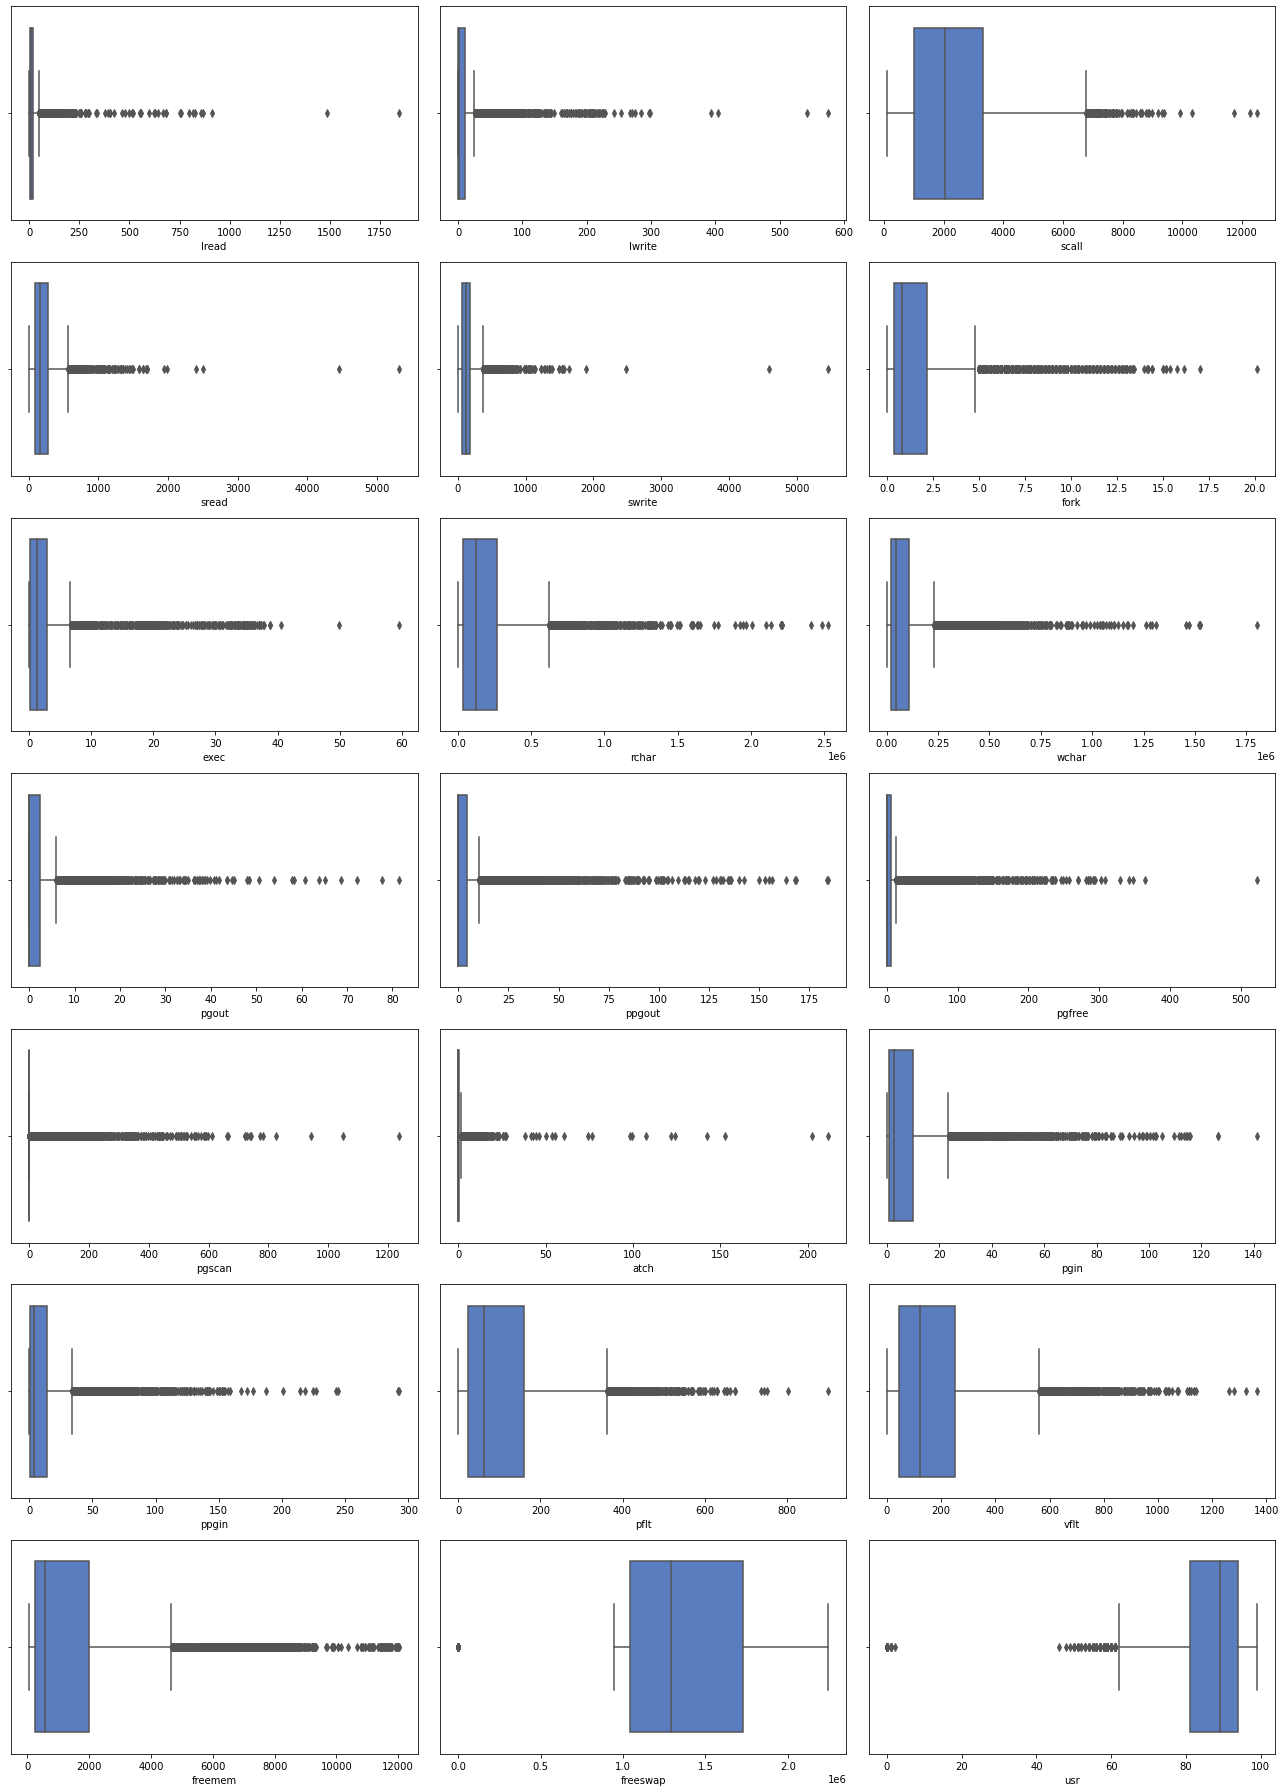

In [10]:
fig,axes=plt.subplots(nrows=7,ncols=3,figsize=(18,25))

sns.boxplot(data=df, x='lread', ax=axes[0][0], palette='muted');
sns.boxplot(data=df, x='lwrite',ax=axes[0][1], palette='muted');
sns.boxplot(data=df, x='scall', ax=axes[0][2], palette='muted');

sns.boxplot(data=df, x='sread',ax=axes[1][0], palette='muted');
sns.boxplot(data=df, x='swrite',ax=axes[1][1], palette='muted');
sns.boxplot(data=df, x='fork',ax=axes[1][2], palette='muted');

sns.boxplot(data=df, x='exec', ax=axes[2][0], palette='muted');
sns.boxplot(data=df, x='rchar',ax=axes[2][1], palette='muted');
sns.boxplot(data=df, x='wchar', ax=axes[2][2], palette='muted');

sns.boxplot(data=df, x='pgout',ax=axes[3][0], palette='muted');
sns.boxplot(data=df, x='ppgout',ax=axes[3][1], palette='muted');
sns.boxplot(data=df, x='pgfree',ax=axes[3][2], palette='muted');

sns.boxplot(data=df, x='pgscan',ax=axes[4][0], palette='muted');
sns.boxplot(data=df, x='atch',ax=axes[4][1], palette='muted');
sns.boxplot(data=df, x='pgin',ax=axes[4][2], palette='muted');

sns.boxplot(data=df, x='ppgin',ax=axes[5][0], palette='muted');
sns.boxplot(data=df, x='pflt',ax=axes[5][1], palette='muted');
sns.boxplot(data=df, x='vflt',ax=axes[5][2], palette='muted');

sns.boxplot(data=df, x='freemem',ax=axes[6][0], palette='muted');
sns.boxplot(data=df, x='freeswap',ax=axes[6][1], palette='muted');
sns.boxplot(data=df, x='usr',ax=axes[6][2], palette='muted');

plt.tight_layout()

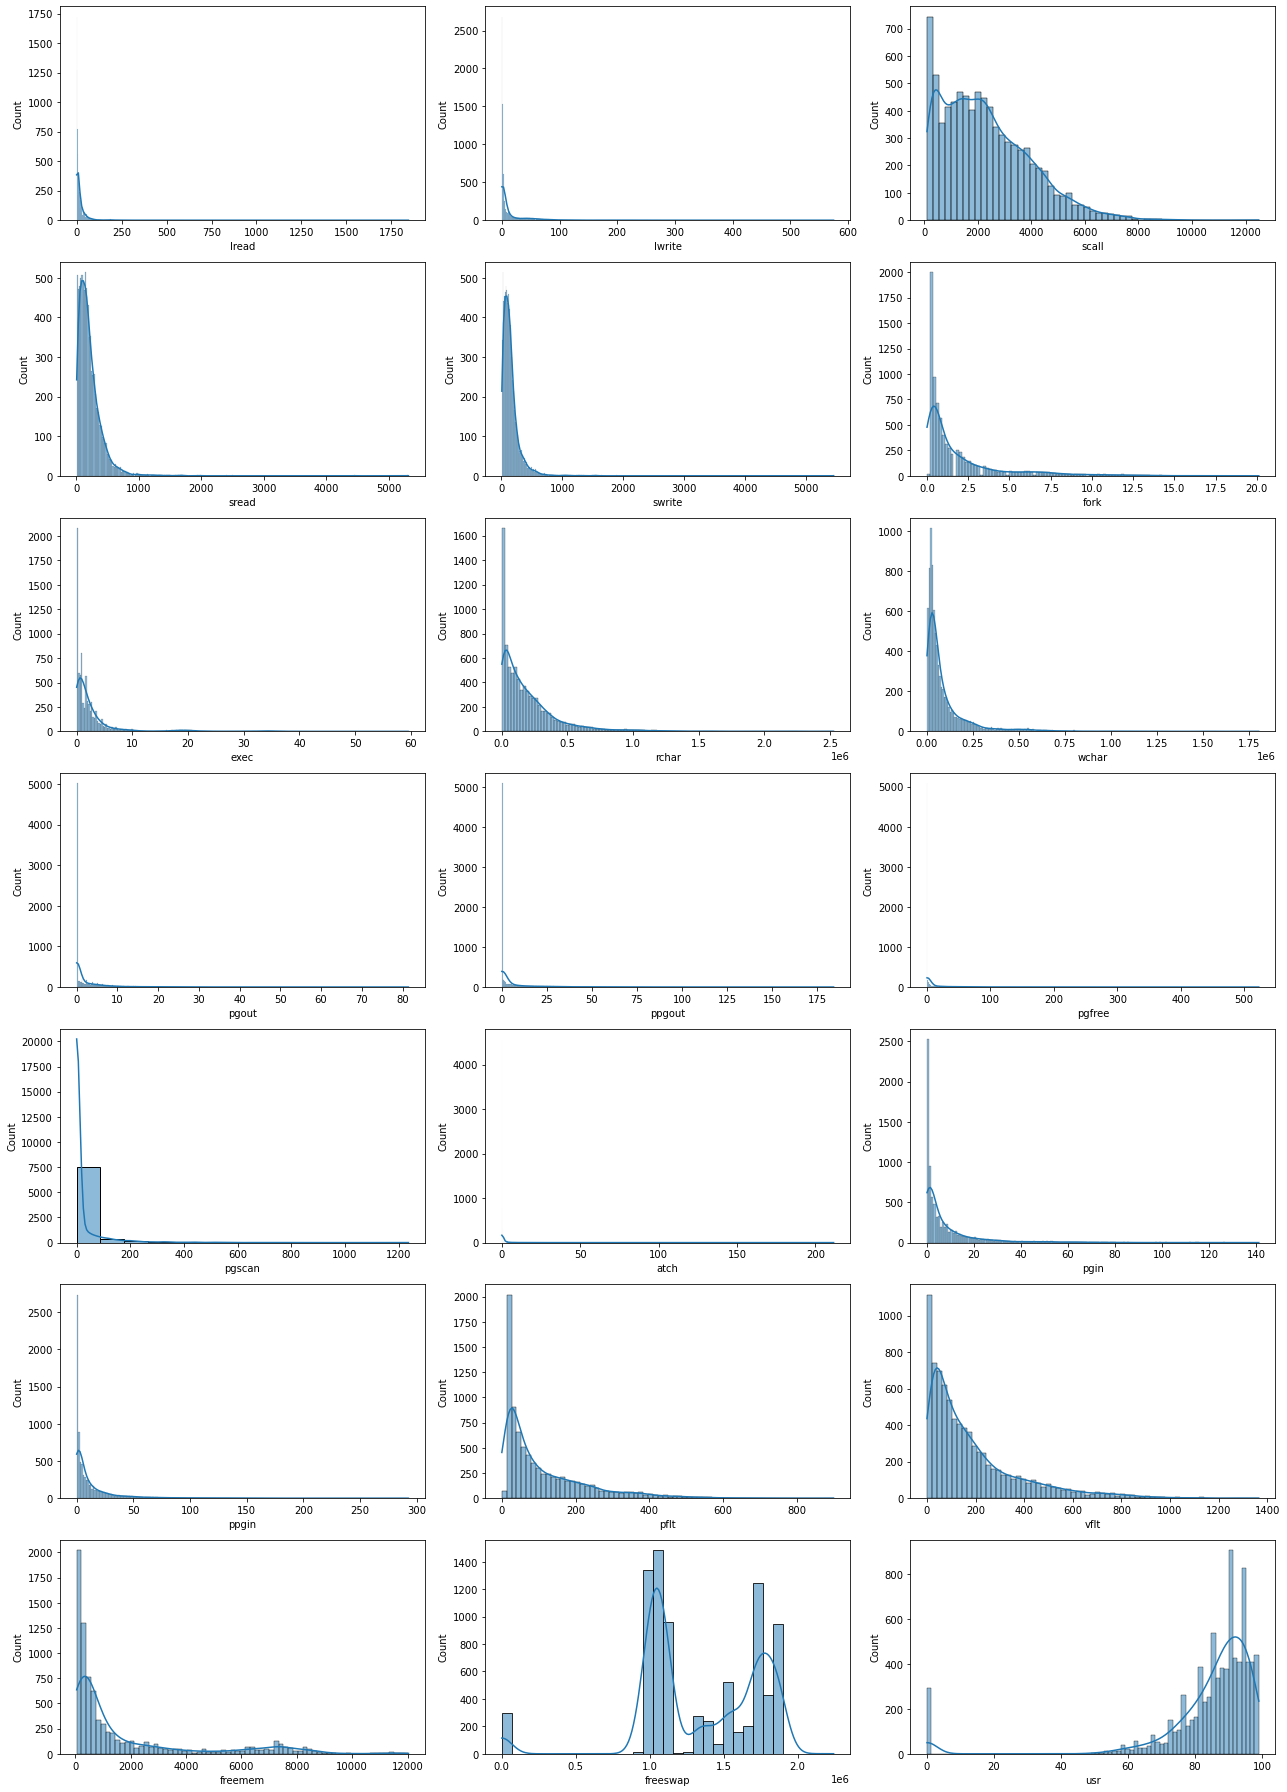

In [11]:
fig,axes=plt.subplots(nrows=7,ncols=3,figsize=(18,25))

sns.histplot(data=df, x='lread', ax=axes[0][0], palette='muted',kde=True);
sns.histplot(data=df, x='lwrite',ax=axes[0][1], palette='muted',kde=True);
sns.histplot(data=df, x='scall', ax=axes[0][2], palette='muted',kde=True);

sns.histplot(data=df, x='sread',ax=axes[1][0], palette='muted',kde=True);
sns.histplot(data=df, x='swrite',ax=axes[1][1], palette='muted',kde=True);
sns.histplot(data=df, x='fork',ax=axes[1][2], palette='muted',kde=True);

sns.histplot(data=df, x='exec', ax=axes[2][0], palette='muted',kde=True);
sns.histplot(data=df, x='rchar',ax=axes[2][1], palette='muted',kde=True);
sns.histplot(data=df, x='wchar', ax=axes[2][2], palette='muted',kde=True);

sns.histplot(data=df, x='pgout',ax=axes[3][0], palette='muted',kde=True);
sns.histplot(data=df, x='ppgout',ax=axes[3][1], palette='muted',kde=True);
sns.histplot(data=df, x='pgfree',ax=axes[3][2], palette='muted',kde=True);

sns.histplot(data=df, x='pgscan',ax=axes[4][0], palette='muted',kde=True);
sns.histplot(data=df, x='atch',ax=axes[4][1], palette='muted',kde=True);
sns.histplot(data=df, x='pgin',ax=axes[4][2], palette='muted',kde=True);

sns.histplot(data=df, x='ppgin',ax=axes[5][0], palette='muted',kde=True);
sns.histplot(data=df, x='pflt',ax=axes[5][1], palette='muted',kde=True);
sns.histplot(data=df, x='vflt',ax=axes[5][2], palette='muted',kde=True);

sns.histplot(data=df, x='freemem',ax=axes[6][0], palette='muted',kde=True);
sns.histplot(data=df, x='freeswap',ax=axes[6][1], palette='muted',kde=True);
sns.histplot(data=df, x='usr',ax=axes[6][2], palette='muted',kde=True);

plt.tight_layout()

### Categorical Variables

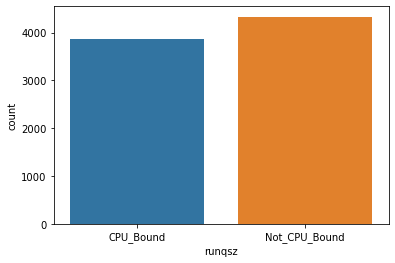

In [12]:
sns.countplot(x=df['runqsz']);

In [13]:
df['runqsz'].value_counts(normalize=True)*100
#Percentage of the data in both categories.

Not_CPU_Bound    52.868652
CPU_Bound        47.131348
Name: runqsz, dtype: float64

## Bi-variate Analysis.

### Continuous variables v/s target variable

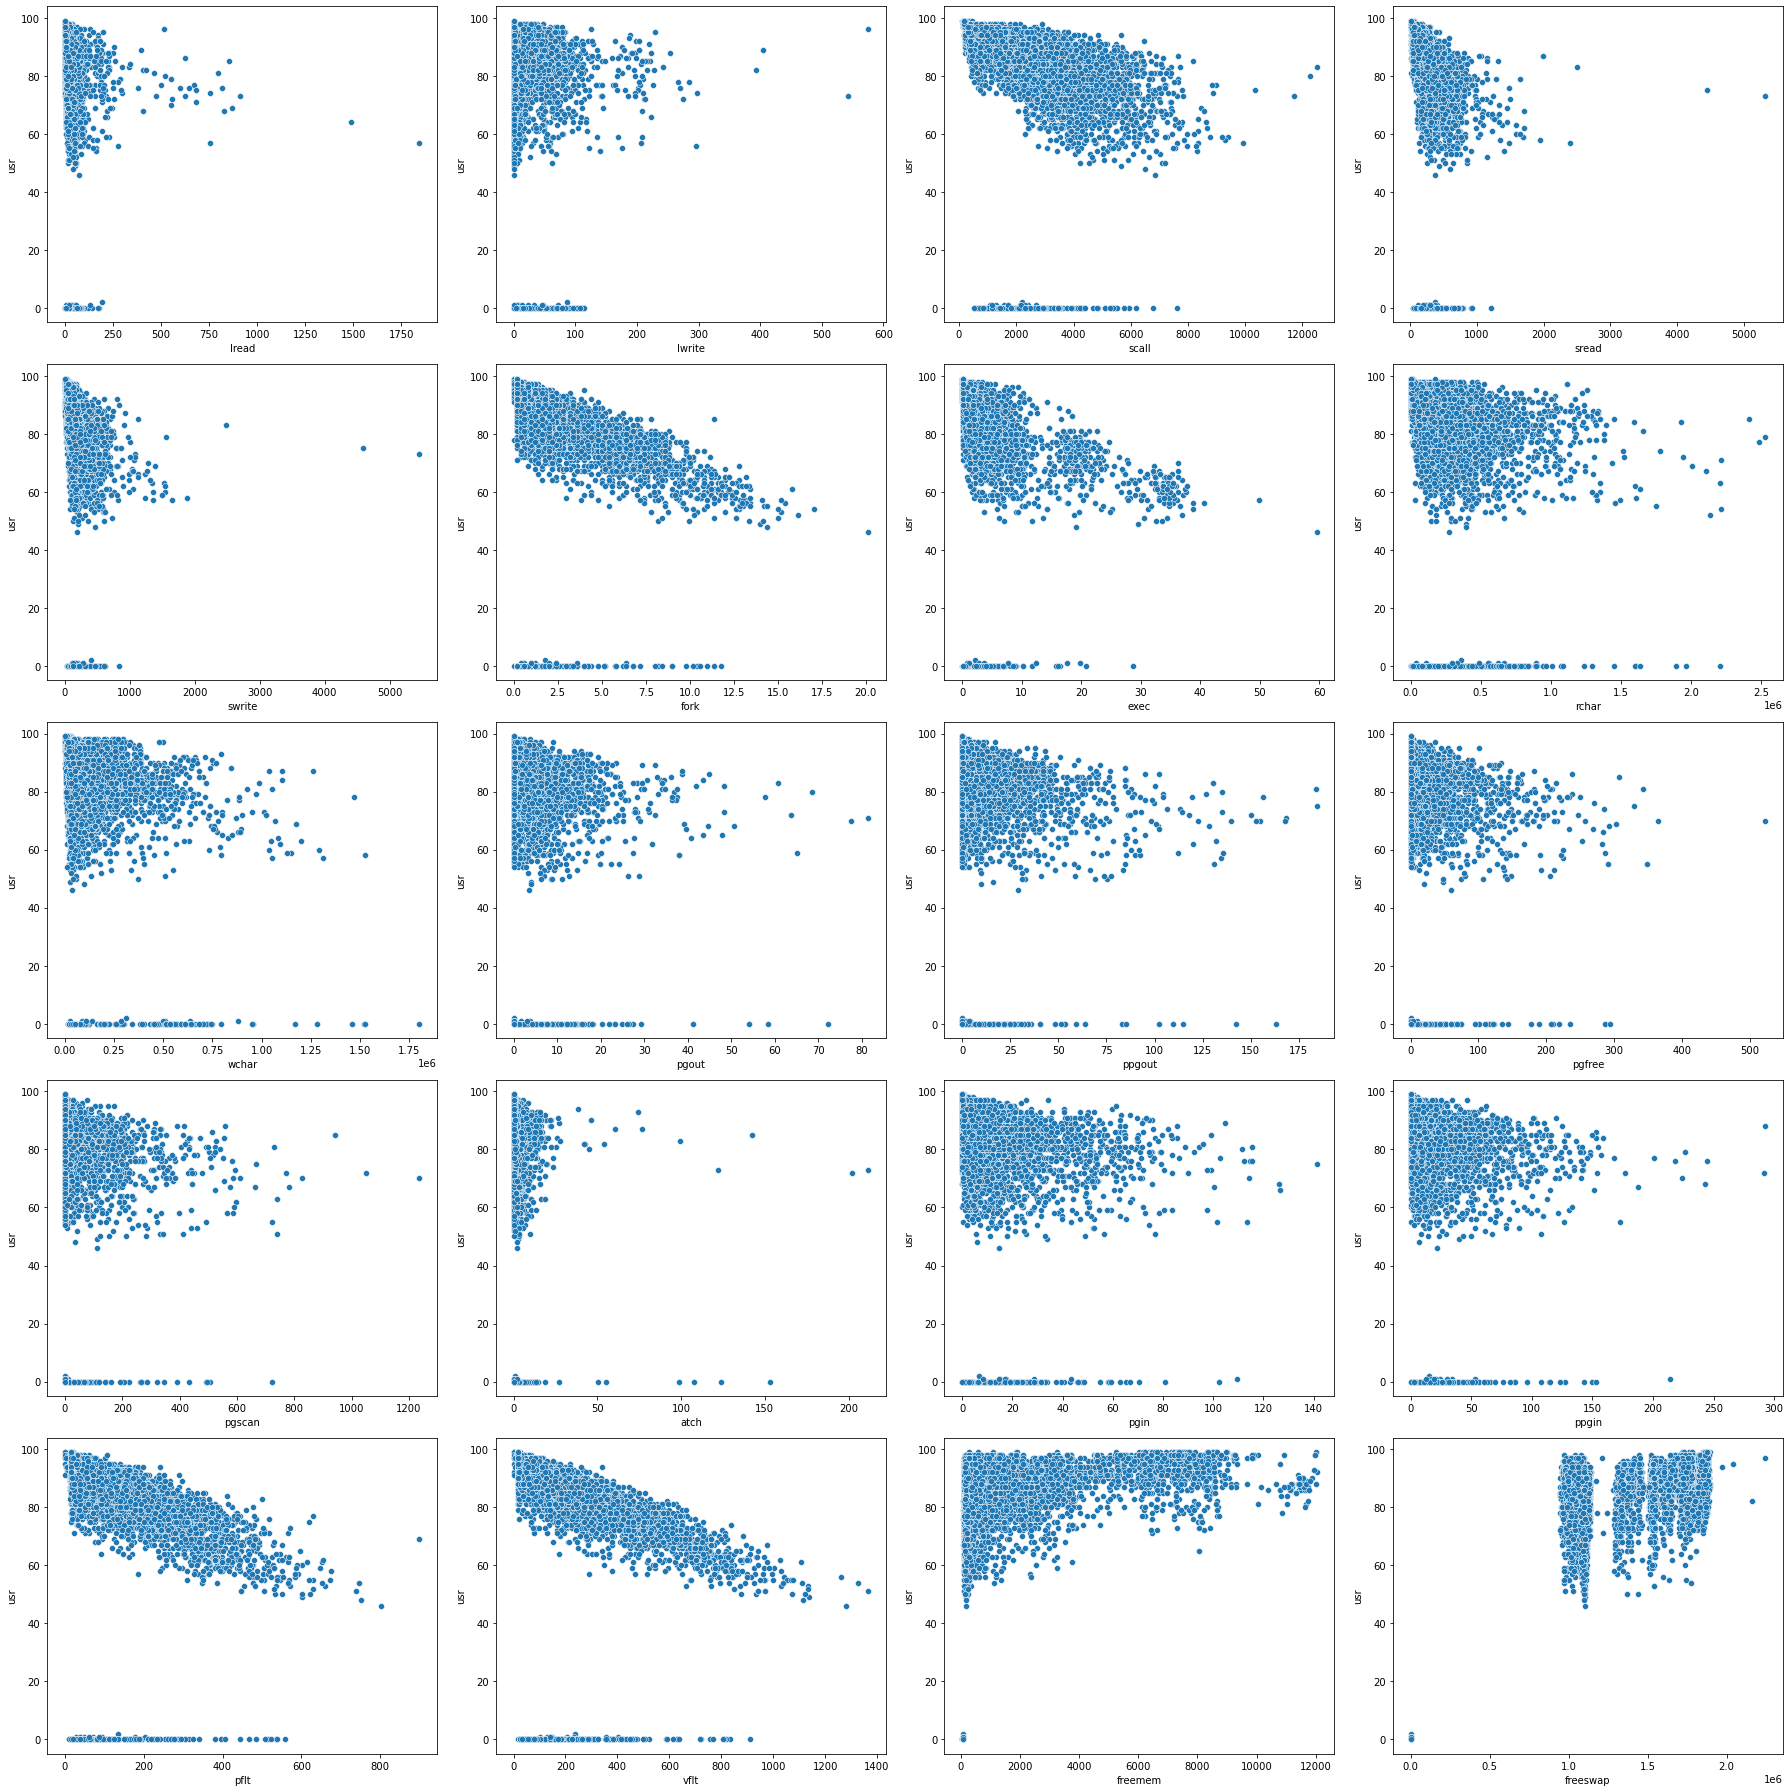

In [14]:
fig,axes=plt.subplots(nrows=5,ncols=4,figsize=(25,25))

sns.scatterplot(data=df, x='lread', y='usr', ax=axes[0][0], palette='muted');
sns.scatterplot(data=df, x='lwrite', y='usr', ax=axes[0][1], palette='muted');
sns.scatterplot(data=df, x='scall', y='usr', ax=axes[0][2], palette='muted');
sns.scatterplot(data=df, x='sread', y='usr',ax=axes[0][3], palette='muted');

sns.scatterplot(data=df, x='swrite', y='usr',ax=axes[1][0], palette='muted');
sns.scatterplot(data=df, x='fork', y='usr',ax=axes[1][1], palette='muted');
sns.scatterplot(data=df, x='exec', y='usr', ax=axes[1][2], palette='muted');
sns.scatterplot(data=df, x='rchar', y='usr',ax=axes[1][3], palette='muted');

sns.scatterplot(data=df, x='wchar', y='usr', ax=axes[2][0], palette='muted');
sns.scatterplot(data=df, x='pgout', y='usr',ax=axes[2][1], palette='muted');
sns.scatterplot(data=df, x='ppgout', y='usr',ax=axes[2][2], palette='muted');
sns.scatterplot(data=df, x='pgfree', y='usr',ax=axes[2][3], palette='muted');

sns.scatterplot(data=df, x='pgscan', y='usr',ax=axes[3][0], palette='muted');
sns.scatterplot(data=df, x='atch', y='usr',ax=axes[3][1], palette='muted');
sns.scatterplot(data=df, x='pgin', y='usr',ax=axes[3][2], palette='muted');
sns.scatterplot(data=df, x='ppgin', y='usr',ax=axes[3][3], palette='muted');

sns.scatterplot(data=df, x='pflt', y='usr',ax=axes[4][0], palette='muted');
sns.scatterplot(data=df, x='vflt', y='usr',ax=axes[4][1], palette='muted');
sns.scatterplot(data=df, x='freemem', y='usr',ax=axes[4][2], palette='muted');
sns.scatterplot(data=df, x='freeswap', y='usr',ax=axes[4][3], palette='muted');

plt.tight_layout()

### Categorical v/s Continuous

<AxesSubplot:xlabel='runqsz', ylabel='usr'>

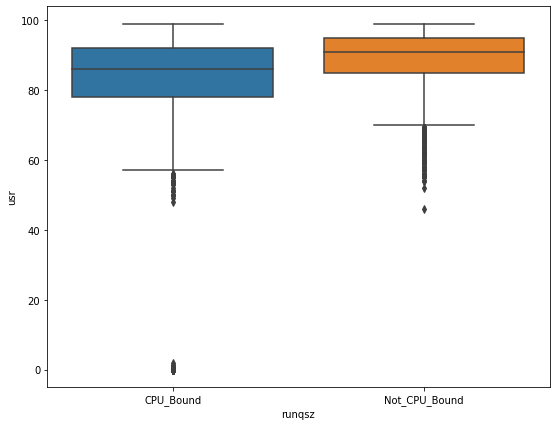

In [15]:
plt.figure(figsize=(9,7))
sns.boxplot(data=df, y='usr',x='runqsz')

0 value is only there for CPU_Bound

## Multivariate Analysis.

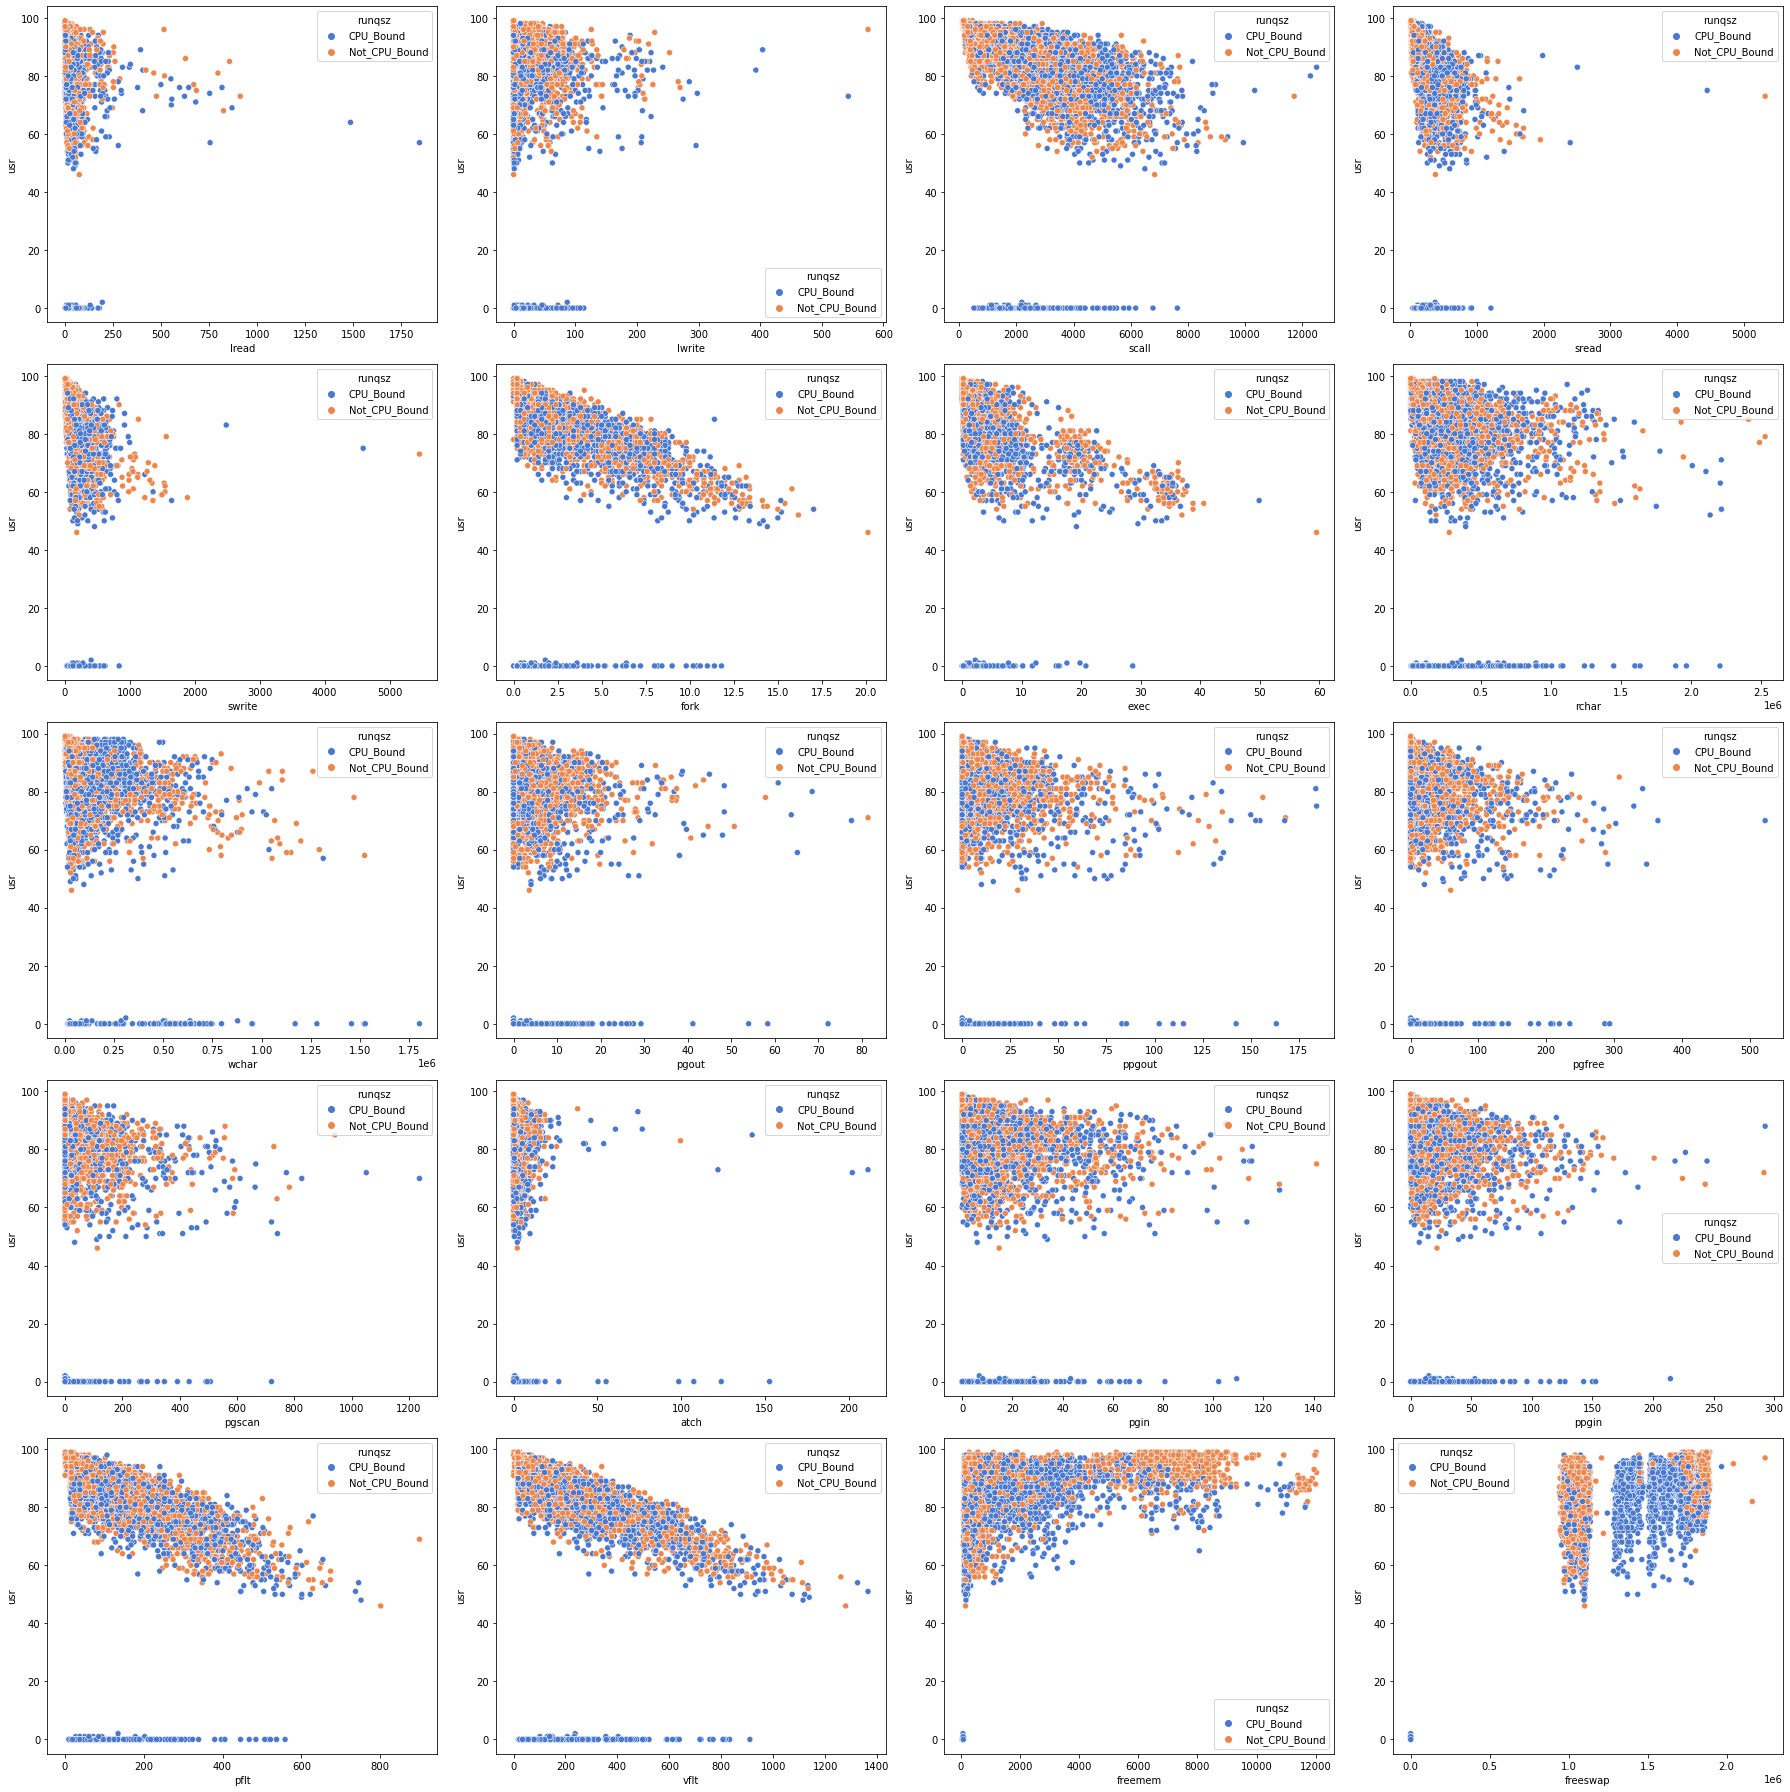

In [16]:
fig,axes=plt.subplots(nrows=5,ncols=4,figsize=(25,25))

sns.scatterplot(data=df, x='lread', y='usr', ax=axes[0][0], palette='muted', hue='runqsz');
sns.scatterplot(data=df, x='lwrite', y='usr', ax=axes[0][1], palette='muted', hue='runqsz');
sns.scatterplot(data=df, x='scall', y='usr', ax=axes[0][2], palette='muted', hue='runqsz');
sns.scatterplot(data=df, x='sread', y='usr',ax=axes[0][3], palette='muted', hue='runqsz');

sns.scatterplot(data=df, x='swrite', y='usr',ax=axes[1][0], palette='muted', hue='runqsz');
sns.scatterplot(data=df, x='fork', y='usr',ax=axes[1][1], palette='muted', hue='runqsz');
sns.scatterplot(data=df, x='exec', y='usr', ax=axes[1][2], palette='muted', hue='runqsz');
sns.scatterplot(data=df, x='rchar', y='usr',ax=axes[1][3], palette='muted', hue='runqsz');

sns.scatterplot(data=df, x='wchar', y='usr', ax=axes[2][0], palette='muted', hue='runqsz');
sns.scatterplot(data=df, x='pgout', y='usr',ax=axes[2][1], palette='muted', hue='runqsz');
sns.scatterplot(data=df, x='ppgout', y='usr',ax=axes[2][2], palette='muted', hue='runqsz');
sns.scatterplot(data=df, x='pgfree', y='usr',ax=axes[2][3], palette='muted', hue='runqsz');

sns.scatterplot(data=df, x='pgscan', y='usr',ax=axes[3][0], palette='muted', hue='runqsz');
sns.scatterplot(data=df, x='atch', y='usr',ax=axes[3][1], palette='muted', hue='runqsz');
sns.scatterplot(data=df, x='pgin', y='usr',ax=axes[3][2], palette='muted', hue='runqsz');
sns.scatterplot(data=df, x='ppgin', y='usr',ax=axes[3][3], palette='muted', hue='runqsz');

sns.scatterplot(data=df, x='pflt', y='usr',ax=axes[4][0], palette='muted', hue='runqsz');
sns.scatterplot(data=df, x='vflt', y='usr',ax=axes[4][1], palette='muted', hue='runqsz');
sns.scatterplot(data=df, x='freemem', y='usr',ax=axes[4][2], palette='muted', hue='runqsz');
sns.scatterplot(data=df, x='freeswap', y='usr',ax=axes[4][3], palette='muted', hue='runqsz');

plt.tight_layout()

Appears very clouded. except for free swap v/s usr

<AxesSubplot:>

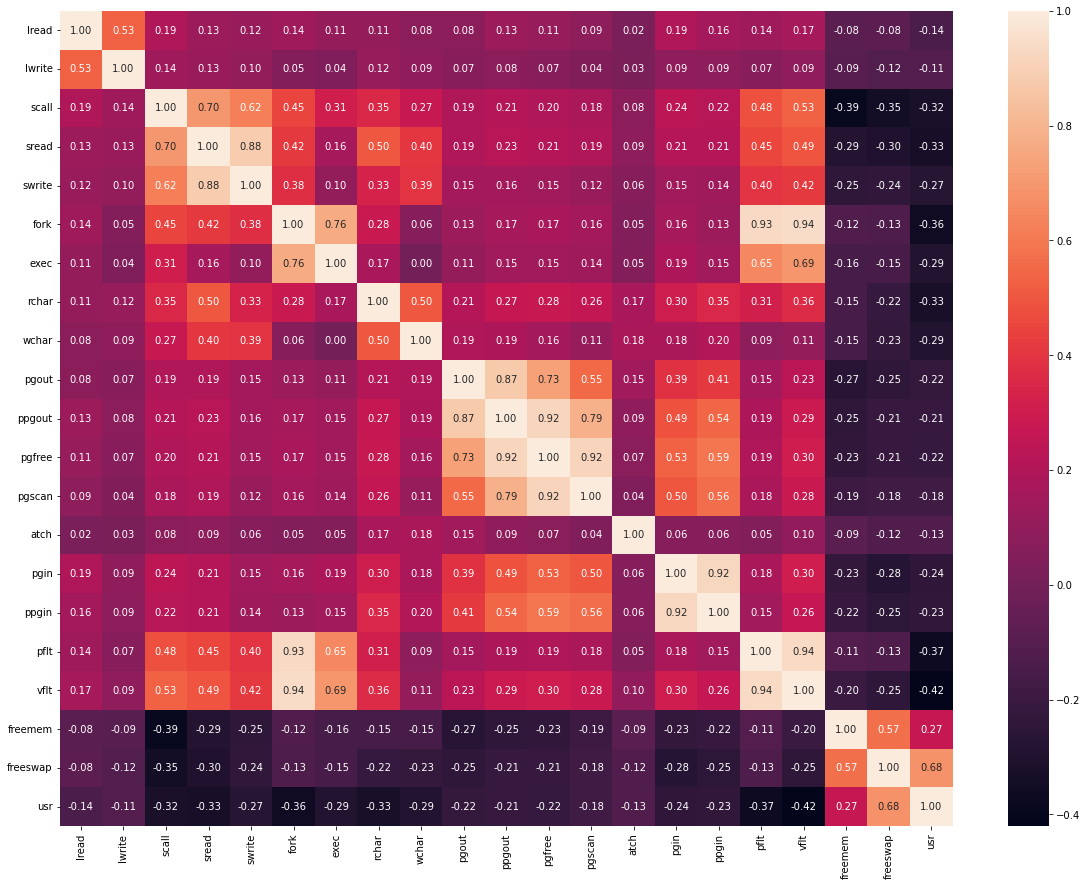

In [17]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True, fmt='.2f')

More than 0.85 correlation is considered very strong correlation

## 1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Check for the possibility of creating new features if required. Also check for outliers and duplicates if there.

### a. Null values Imputation. 

Null values are present in the rchar and wchar columns. Both the columns have outliers. hence, median will be used to impute these values

In [18]:
a=df['rchar'].median()
b=df['wchar'].median()
df['rchar'].replace(np.nan, a, inplace=True)
df['wchar'].replace(np.nan, b, inplace=True)

In [19]:
df.isnull().sum()

lread       0
lwrite      0
scall       0
sread       0
swrite      0
fork        0
exec        0
rchar       0
wchar       0
pgout       0
ppgout      0
pgfree      0
pgscan      0
atch        0
pgin        0
ppgin       0
pflt        0
vflt        0
runqsz      0
freemem     0
freeswap    0
usr         0
dtype: int64

### b. Zero values


In [20]:
for col in df.columns:
    n=df[df[col]==0].shape[0]
    print(f'There are {n} zero values in the column {col}')

There are 675 zero values in the column lread
There are 2684 zero values in the column lwrite
There are 0 zero values in the column scall
There are 0 zero values in the column sread
There are 0 zero values in the column swrite
There are 21 zero values in the column fork
There are 21 zero values in the column exec
There are 0 zero values in the column rchar
There are 0 zero values in the column wchar
There are 4878 zero values in the column pgout
There are 4878 zero values in the column ppgout
There are 4869 zero values in the column pgfree
There are 6448 zero values in the column pgscan
There are 4575 zero values in the column atch
There are 1220 zero values in the column pgin
There are 1220 zero values in the column ppgin
There are 3 zero values in the column pflt
There are 0 zero values in the column vflt
There are 0 zero values in the column runqsz
There are 0 zero values in the column freemem
There are 0 zero values in the column freeswap
There are 283 zero values in the column usr

In [21]:
6448/df.shape[0]

0.787109375

pgscan has the most number of zeros. 78% of the data is 0 


The values of the columns could be zero if the system is idle. Hence we are not going impute zero values.

### c. Creating new feature

We dont see any scope to create new feature from the existing ones. We may have to consult a subject matter expert to guide us further.


### d. Outliers

As seen from the box plots, there are outliers present in all the columns. We will treat it since linear regression is sensitive to outliers 

In [22]:
#Make a copy of the data with outliers. so we can built a model on this data later to check its performance.
df_out=df.copy()

In [23]:
#Define a function which returns the Upper and Lower limit to detect outliers for each feature
def remove_outlier(col):
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range  

In [24]:
featurelist=['lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec', 'rchar',
       'wchar', 'pgout', 'ppgout', 'pgfree', 'pgscan', 'atch', 'pgin', 'ppgin',
       'pflt', 'vflt', 'freemem', 'freeswap', 'usr']

In [25]:
#Cap & floor the values beyond the outlier boundaries
for i in featurelist:
    LL, UL = remove_outlier(df[i])
    df[i] = np.where(df[i] > UL, UL, df[i])
    df[i] = np.where(df[i] < LL, LL, df[i])

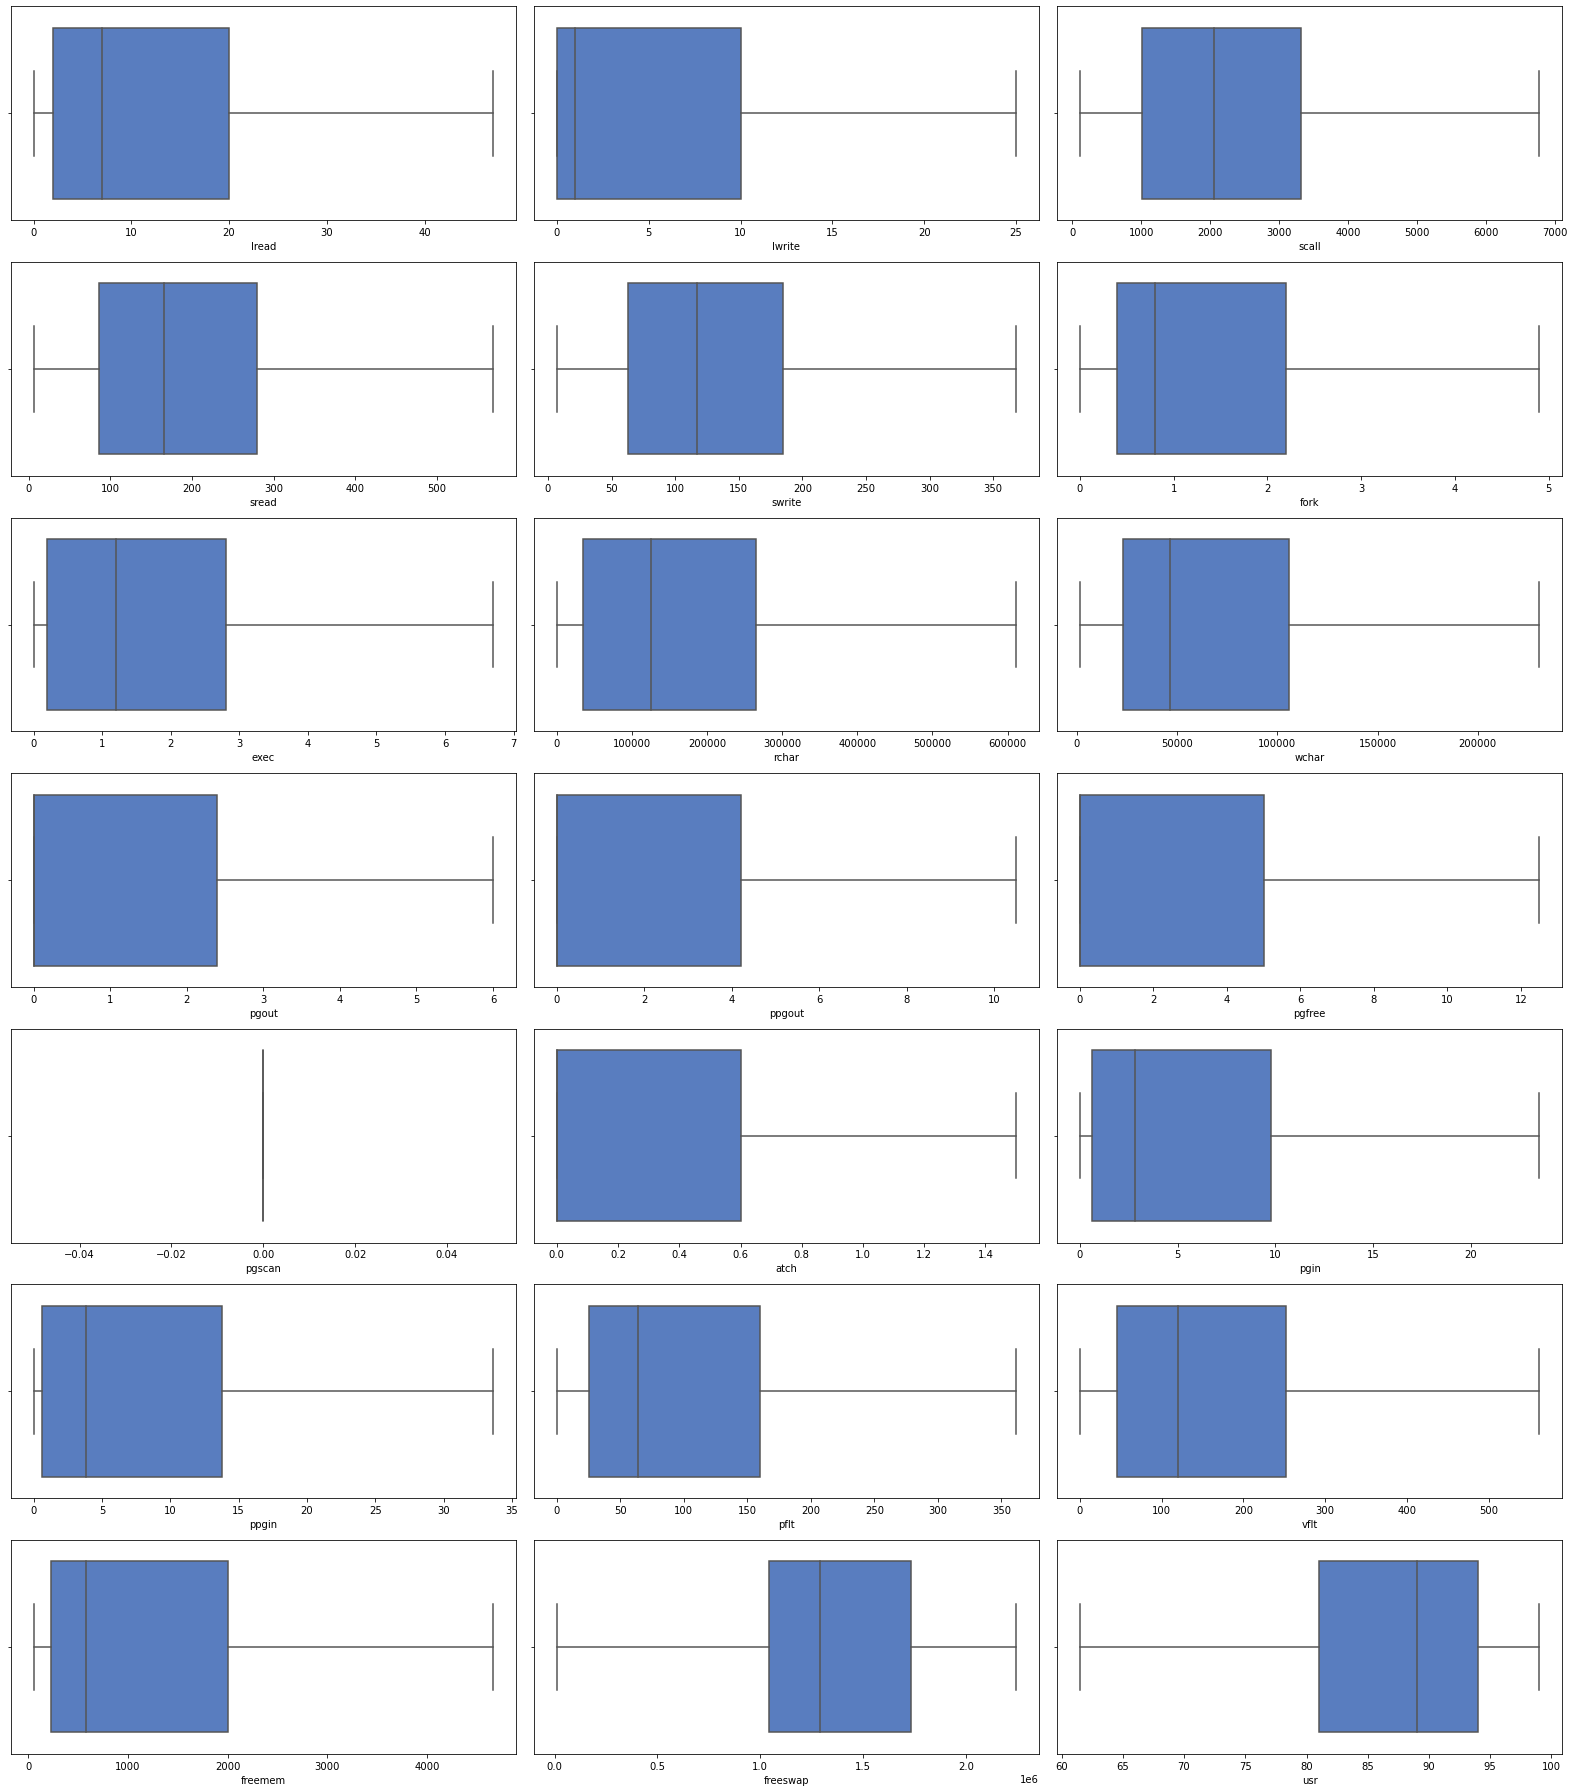

In [26]:
fig,axes=plt.subplots(nrows=7,ncols=3,figsize=(22,25))

sns.boxplot(data=df, x='lread', ax=axes[0][0], palette='muted');
sns.boxplot(data=df, x='lwrite',ax=axes[0][1], palette='muted');
sns.boxplot(data=df, x='scall', ax=axes[0][2], palette='muted');

sns.boxplot(data=df, x='sread',ax=axes[1][0], palette='muted');
sns.boxplot(data=df, x='swrite',ax=axes[1][1], palette='muted');
sns.boxplot(data=df, x='fork',ax=axes[1][2], palette='muted');

sns.boxplot(data=df, x='exec', ax=axes[2][0], palette='muted');
sns.boxplot(data=df, x='rchar',ax=axes[2][1], palette='muted');
sns.boxplot(data=df, x='wchar', ax=axes[2][2], palette='muted');

sns.boxplot(data=df, x='pgout',ax=axes[3][0], palette='muted');
sns.boxplot(data=df, x='ppgout',ax=axes[3][1], palette='muted');
sns.boxplot(data=df, x='pgfree',ax=axes[3][2], palette='muted');

sns.boxplot(data=df, x='pgscan',ax=axes[4][0], palette='muted');
sns.boxplot(data=df, x='atch',ax=axes[4][1], palette='muted');
sns.boxplot(data=df, x='pgin',ax=axes[4][2], palette='muted');

sns.boxplot(data=df, x='ppgin',ax=axes[5][0], palette='muted');
sns.boxplot(data=df, x='pflt',ax=axes[5][1], palette='muted');
sns.boxplot(data=df, x='vflt',ax=axes[5][2], palette='muted');

sns.boxplot(data=df, x='freemem',ax=axes[6][0], palette='muted');
sns.boxplot(data=df, x='freeswap',ax=axes[6][1], palette='muted');
sns.boxplot(data=df, x='usr',ax=axes[6][2], palette='muted');

plt.tight_layout()

In [27]:
df['pgscan'].value_counts()

0.0    8192
Name: pgscan, dtype: int64

Since the value for the variable pgscan is all zero. it is no good for us. we will drop this column and proceed further.

In [28]:
df=df.drop('pgscan',axis=1)

In [29]:
df.shape

(8192, 21)

### e. Duplicates


In [30]:
df.duplicated().sum()

0


There are no duplicates.

## 1.3 Encode the data (having string values) for Modelling. Split the data into train and test (70:30). Apply Linear regression using scikit learn. Perform checks for significant variables using appropriate method from statsmodel. Create multiple models and check the performance of Predictions on Train and Test sets using Rsquare, RMSE & Adj Rsquare. Compare these models and select the best one with appropriate reasoning.

### a. Encoding the data

In [31]:
df = pd.get_dummies(df, columns=["runqsz"], drop_first=True)

In [32]:
df.head()

lread  lwrite   scall  sread  swrite  fork  exec     rchar    wchar  pgout  \
0    1.0     0.0  2147.0   79.0    68.0   0.2   0.2   40671.0  53995.0    0.0   
1    0.0     0.0   170.0   18.0    21.0   0.2   0.2     448.0   8385.0    0.0   
2   15.0     3.0  2162.0  159.0   119.0   2.0   2.4  125473.5  31950.0    0.0   
3    0.0     0.0   160.0   12.0    16.0   0.2   0.2  125473.5   8670.0    0.0   
4    5.0     1.0   330.0   39.0    38.0   0.4   0.4  125473.5  12185.0    0.0   

   ...  pgfree  atch  pgin  ppgin    pflt    vflt   freemem   freeswap   usr  \
0  ...     0.0   0.0   1.6    2.6   16.00   26.40  4659.125  1730946.0  95.0   
1  ...     0.0   0.0   0.0    0.0   15.63   16.83  4659.125  1869002.0  97.0   
2  ...     0.0   1.2   6.0    9.4  150.20  220.20   702.000  1021237.0  87.0   
3  ...     0.0   0.0   0.2    0.2   15.60   16.80  4659.125  1863704.0  98.0   
4  ...     0.0   0.0   1.0    1.2   37.80   47.60   633.000  1760253.0  90.0   

   runqsz_Not_CPU_Bound  
0                     0  
1                     1  
2                     1  
3                     1  
4                     1  

[5 rows x 21 columns]

### Separating independent and dependent variables

In [33]:
X=df.drop('usr',axis=1)
y=df['usr']

In [34]:
X = sm.add_constant(X)


### b. Splitting the data into train and test

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [36]:
X_train.shape

(5734, 21)

In [37]:
X_test.shape

(2458, 21)

In [38]:
y_train.shape

(5734,)

In [39]:
y_test.shape

(2458,)

### Model1

In [40]:
model=sm.OLS(y_train, X_train)
model1=model.fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     1115.
Date:                Sat, 27 May 2023   Prob (F-statistic):               0.00
Time:                        22:08:16   Log-Likelihood:                -16657.
No. Observations:                5734   AIC:                         3.336e+04
Df Residuals:                    5713   BIC:                         3.350e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   84.1217 

### RMSE

In [41]:
# Prediction on Train data
predicted_train=model1.predict(X_train)

#Calculate MSE on train
mse=metrics.mean_squared_error(y_train,predicted_train)

#RMSE on train 
np.sqrt(mse) 

4.419536092979901

## Removing multi collinearity from the data using VIF values

In [42]:
# let's check the VIF of the predictors

vif_series1 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

const                   29.229332
lread                    5.350560
lwrite                   4.328397
scall                    2.960609
sread                    6.420172
swrite                   5.597135
fork                    13.035359
exec                     3.241417
rchar                    2.133616
wchar                    1.584381
pgout                   11.360363
ppgout                  29.404223
pgfree                  16.496748
atch                     1.875901
pgin                    13.809339
ppgin                   13.951855
pflt                    12.001460
vflt                    15.971049
freemem                  1.961304
freeswap                 1.841239
runqsz_Not_CPU_Bound     1.156815
dtype: float64



In [43]:
df.columns

Index(['lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec', 'rchar',
       'wchar', 'pgout', 'ppgout', 'pgfree', 'atch', 'pgin', 'ppgin', 'pflt',
       'vflt', 'freemem', 'freeswap', 'usr', 'runqsz_Not_CPU_Bound'],
      dtype='object')

In [44]:
# Function to calculate adjusted r square value, when sklearn is used to build the model.
def adj_r(model, X, y):
    return 1 - ( 1-model.score(X, y) ) * ( len(y) - 1 ) / ( len(y) - X.shape[1] - 1 )

In [45]:
high_vif=['lread',  'sread', 'swrite', 'fork', 'pgout', 'ppgout', 'pgfree', 'atch', 'freemem', 'freeswap', 'runqsz_Not_CPU_Bound']
for col in high_vif: 
    X_train_check = X_train.drop([col], axis=1)
    
    regression_model_check = LinearRegression()
    regression_model_check.fit(X_train_check, y_train)

    print(f"After dropping the column {col}")
    print(
        "R-squared:",
        np.round(regression_model_check.score(X_train_check, y_train), 3),
        "\nAdjusted R-squared:",
        np.round(adj_r(regression_model_check, X_train_check, y_train), 3),
    )
    print('\n')

After dropping the column lread
R-squared: 0.794 
Adjusted R-squared: 0.794


After dropping the column sread
R-squared: 0.796 
Adjusted R-squared: 0.795


After dropping the column swrite
R-squared: 0.796 
Adjusted R-squared: 0.795


After dropping the column fork
R-squared: 0.796 
Adjusted R-squared: 0.795


After dropping the column pgout
R-squared: 0.796 
Adjusted R-squared: 0.795


After dropping the column ppgout
R-squared: 0.796 
Adjusted R-squared: 0.795


After dropping the column pgfree
R-squared: 0.796 
Adjusted R-squared: 0.795


After dropping the column atch
R-squared: 0.795 
Adjusted R-squared: 0.795


After dropping the column freemem
R-squared: 0.793 
Adjusted R-squared: 0.792


After dropping the column freeswap
R-squared: 0.719 
Adjusted R-squared: 0.718


After dropping the column runqsz_Not_CPU_Bound
R-squared: 0.79 
Adjusted R-squared: 0.79




#### Removing freeswap is decreasing the r square value considerably. Hence, freeswap is an important variable

<AxesSubplot:>

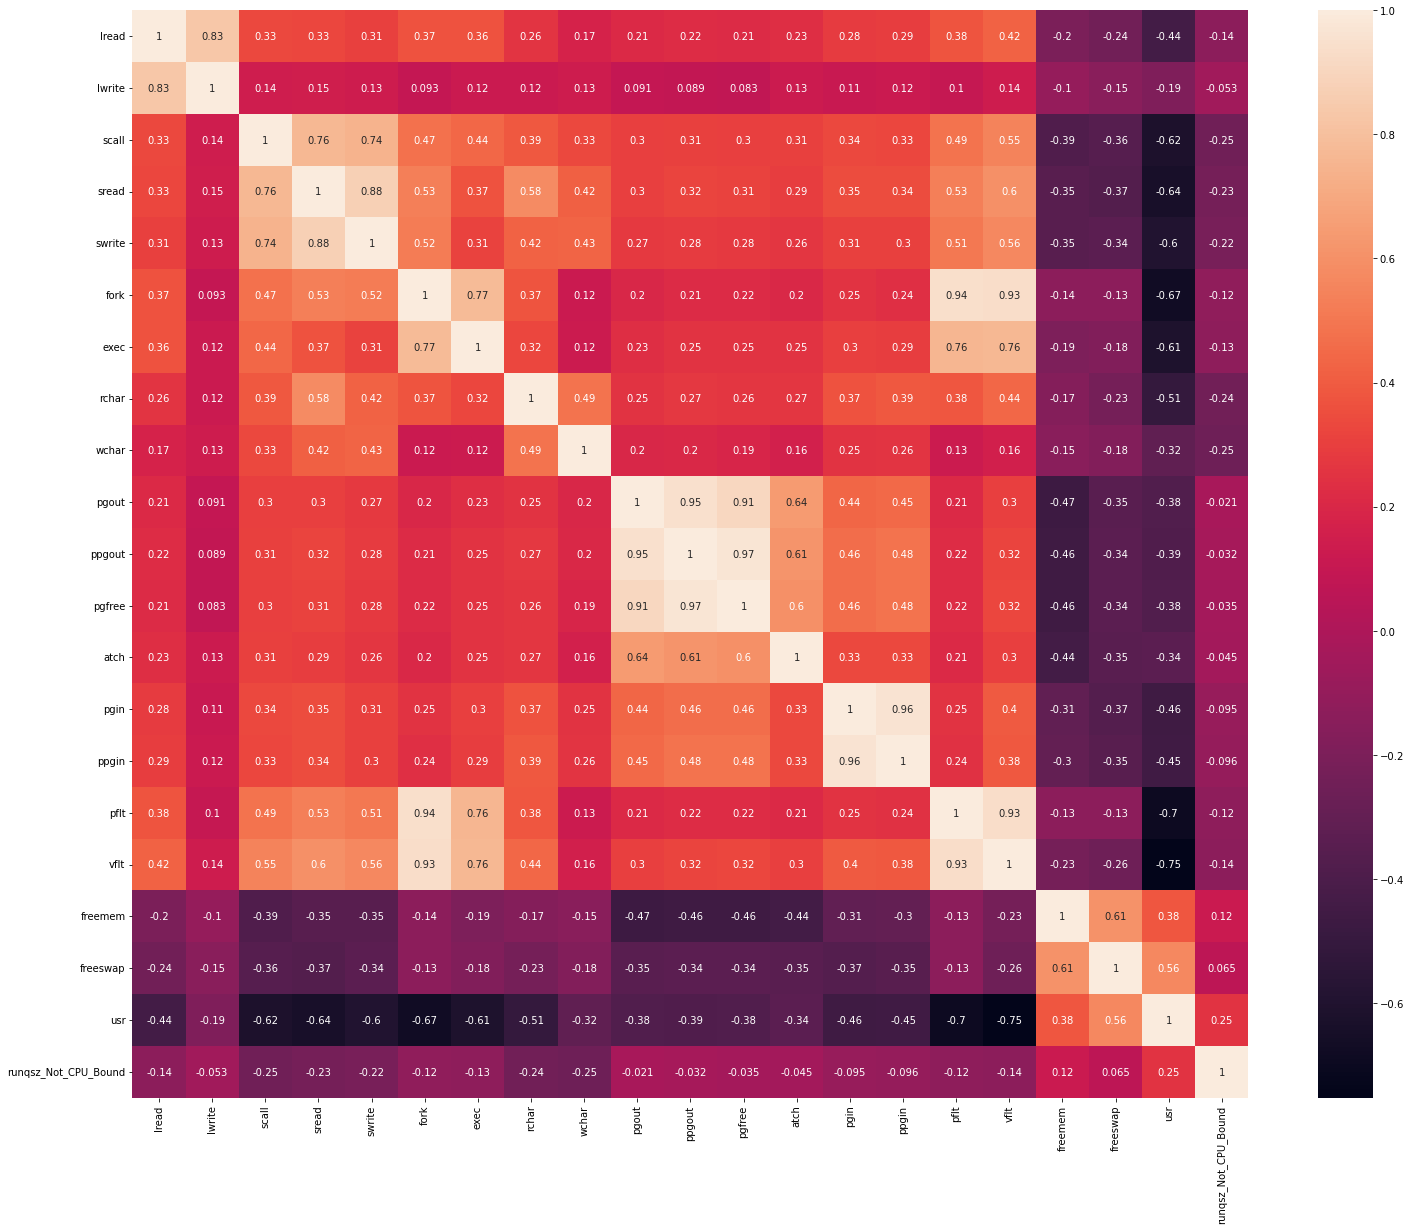

In [46]:
plt.figure(figsize=(25,20))
sns.heatmap(df.corr(),annot=True)

sread & swrite

pgout,ppgout & pgfree

The above pairs are highly correlated. Hence in the next model we will drop sread, pgout and ppgout

## Model 2

In [47]:
X_train=X_train.drop(['sread','pgout', 'ppgout'],axis=1)
X_test=X_test.drop(['sread','pgout', 'ppgout'],axis=1)

In [48]:
model=sm.OLS(y_train,X_train)
model2=model.fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     1301.
Date:                Sat, 27 May 2023   Prob (F-statistic):               0.00
Time:                        22:08:19   Log-Likelihood:                -16677.
No. Observations:                5734   AIC:                         3.339e+04
Df Residuals:                    5716   BIC:                         3.351e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   84.1249 

## RMSE

In [49]:
# Prediction on Train data
predicted_train=model2.predict(X_train)

#Calculate MSE on train
mse=metrics.mean_squared_error(y_train,predicted_train)

#RMSE on train 
np.sqrt(mse) 

4.435177122680095

## Multi collinearity Check

In [50]:
# let's check the VIF of the predictors

vif_series1 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

const                   28.971680
lread                    5.339549
lwrite                   4.317763
scall                    2.712220
swrite                   3.209737
fork                    12.992207
exec                     3.230371
rchar                    1.728690
wchar                    1.565579
pgfree                   1.962290
atch                     1.743890
pgin                    13.762509
ppgin                   13.887219
pflt                    11.991242
vflt                    15.846504
freemem                  1.952978
freeswap                 1.828573
runqsz_Not_CPU_Bound     1.152294
dtype: float64



In [51]:
high_vif=['lread',   'fork', 'pgin', 'ppgin', 'pflt','vflt']
for col in high_vif: 
    X_train_check = X_train.drop([col], axis=1)
    
    regression_model_check = LinearRegression()
    regression_model_check.fit(X_train_check, y_train)

    print(f"After dropping the column {col}")
    print(
        "R-squared:",
        np.round(regression_model_check.score(X_train_check, y_train), 3),
        "\nAdjusted R-squared:",
        np.round(adj_r(regression_model_check, X_train_check, y_train), 3),
    )
    print('\n')

After dropping the column lread
R-squared: 0.793 
Adjusted R-squared: 0.792


After dropping the column fork
R-squared: 0.795 
Adjusted R-squared: 0.794


After dropping the column pgin
R-squared: 0.795 
Adjusted R-squared: 0.794


After dropping the column ppgin
R-squared: 0.794 
Adjusted R-squared: 0.794


After dropping the column pflt
R-squared: 0.784 
Adjusted R-squared: 0.784


After dropping the column vflt
R-squared: 0.794 
Adjusted R-squared: 0.794




#### No significant drop in r-square and adjusted r-square. 

fork, pflt,vflt

pgin, ppgin 

These two pairs are strongly correlated. 

We will drop pflt,vflt and ppgin in the next model

## Model 3

In [52]:
X_train=X_train.drop(['fork','vflt', 'ppgin'],axis=1)
X_test=X_test.drop(['fork','vflt', 'ppgin'],axis=1)

In [53]:
model=sm.OLS(y_train,X_train)
model3=model.fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     1572.
Date:                Sat, 27 May 2023   Prob (F-statistic):               0.00
Time:                        22:08:20   Log-Likelihood:                -16691.
No. Observations:                5734   AIC:                         3.341e+04
Df Residuals:                    5719   BIC:                         3.351e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   84.0679 

## RMSE

In [54]:
# Prediction on Train data
predicted_train=model3.predict(X_train)

#Calculate MSE on train
mse=metrics.mean_squared_error(y_train,predicted_train)

#RMSE on train 
np.sqrt(mse) 

4.445682431227533

## VIF

In [55]:
# let's check the VIF of the predictors

vif_series1 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

const                   28.362416
lread                    5.274772
lwrite                   4.287213
scall                    2.654972
swrite                   3.013045
exec                     2.847221
rchar                    1.671792
wchar                    1.532280
pgfree                   1.918247
atch                     1.732431
pgin                     1.524967
pflt                     3.434003
freemem                  1.950595
freeswap                 1.768996
runqsz_Not_CPU_Bound     1.151419
dtype: float64



In [56]:
high_vif=['lread']
for col in high_vif: 
    X_train_check = X_train.drop([col], axis=1)
    
    regression_model_check = LinearRegression()
    regression_model_check.fit(X_train_check, y_train)

    print(f"After dropping the column {col}")
    print(
        "R-squared:",
        np.round(regression_model_check.score(X_train_check, y_train), 3),
        "\nAdjusted R-squared:",
        np.round(adj_r(regression_model_check, X_train_check, y_train), 3),
    )
    print('\n')

After dropping the column lread
R-squared: 0.792 
Adjusted R-squared: 0.791




We will drop this column.

## Model 4

In [57]:
X_train=X_train.drop(['lread'],axis=1)
X_test=X_test.drop(['lread'],axis=1)

In [58]:
model=sm.OLS(y_train,X_train)
model4=model.fit()
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     1672.
Date:                Sat, 27 May 2023   Prob (F-statistic):               0.00
Time:                        22:08:20   Log-Likelihood:                -16719.
No. Observations:                5734   AIC:                         3.347e+04
Df Residuals:                    5720   BIC:                         3.356e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   83.9725 

In [59]:
# let's check the VIF of the predictors

vif_series1 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

const                   28.315818
lwrite                   1.052259
scall                    2.648774
swrite                   3.012409
exec                     2.819098
rchar                    1.671676
wchar                    1.529035
pgfree                   1.917372
atch                     1.732230
pgin                     1.483892
pflt                     3.253088
freemem                  1.950475
freeswap                 1.762866
runqsz_Not_CPU_Bound     1.140440
dtype: float64



There is no multicollinearity in the model now. and the p-values tell us that all features are significant in the model. We will fir the test data to the model and check the scores

## RMSE

In [60]:
# Prediction on Train data
predicted_train=model4.predict(X_train)

#Calculate MSE on train
mse=metrics.mean_squared_error(y_train,predicted_train)

#RMSE on train 
np.sqrt(mse) 

4.467611664735455

## Assumptions

In [61]:
y_train.shape

(5734,)

In [62]:
model4=sm.OLS(y_train,X_train).fit()

In [63]:
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train.values.flatten()  # actual values
df_pred["Fitted Values"] = model4.fittedvalues.values  # predicted values
df_pred["Residuals"] = model4.resid.values  # residuals

df_pred.head()


Actual Values  Fitted Values  Residuals
0           91.0      89.300965   1.699035
1           94.0      91.690164   2.309836
2           61.5      75.802891 -14.302891
3           83.0      80.511458   2.488542
4           94.0      97.522942  -3.522942

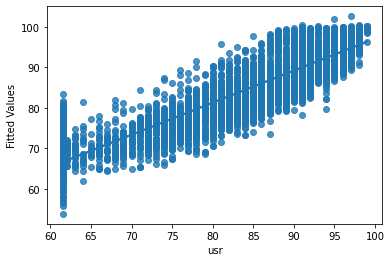

In [64]:
sns.regplot(x=y_train, y=df_pred["Fitted Values"]);

### Linearity

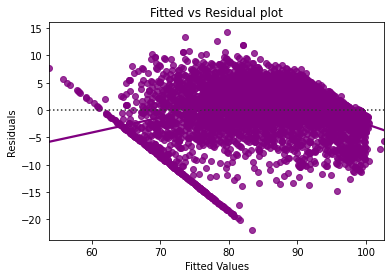

In [65]:
# let us plot the fitted values vs residuals
sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

Doesnot follow any pattern. this looks clouded. hence we may say the model is linear

### Normality of residuals

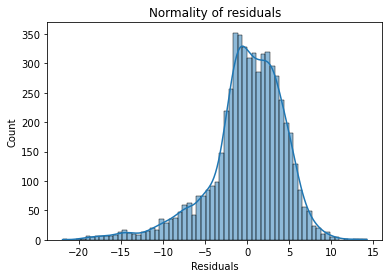

In [66]:
sns.histplot(df_pred["Residuals"], kde=True)
plt.title("Normality of residuals")
plt.show()

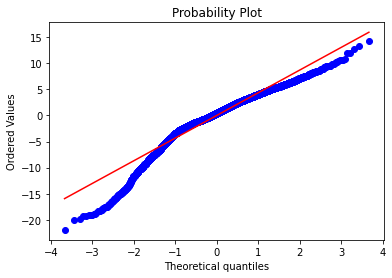

In [67]:


stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

In [68]:
model=sm.OLS(y_test,X_test)
model4=model.fit()
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     617.8
Date:                Sat, 27 May 2023   Prob (F-statistic):               0.00
Time:                        22:08:29   Log-Likelihood:                -7272.1
No. Observations:                2458   AIC:                         1.457e+04
Df Residuals:                    2444   BIC:                         1.465e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   81.4222 

## RMSE

In [69]:
# Prediction on Test data
predicted_test=model4.predict(X_test)

#Calculate MSE on train
mse=metrics.mean_squared_error(y_test,predicted_test)

#RMSE on train 
np.sqrt(mse) 

4.662837538494124

## MAE

In [70]:
# let's check the MAE on the train data
mae1 = mean_absolute_error(y_train, df_pred["Fitted Values"])
mae1

3.3209119257296678

In [71]:
y_pred = model4.predict(X_test)
# let's check the MAE on the test data
mae2 = mean_absolute_error(y_test, y_pred)
mae2

3.488398527644669

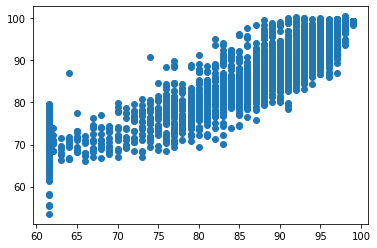

In [72]:
plt.scatter(y_test, y_pred)
plt.show()

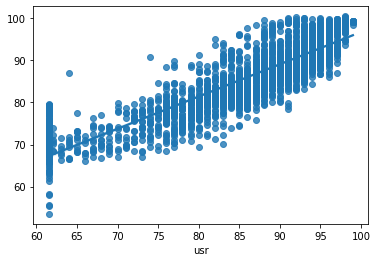

In [73]:
sns.regplot(x=y_test, y=y_pred, data=df);

## Final Equation

In [74]:
# Let us write the equation of linear regression
Equation = "usr ="
print(Equation, end=" ")
for i in range(len(X_train.columns)):
    if i == 0:
        print(model4.params[i], "+", end=" ")
    elif i != len(X_train.columns) - 1:
        print(
            model4.params[i],
            "* (",
            X_train.columns[i],
            ")",
            "+",
            end="  ",
        )
    else:
        print(model4.params[i], "* (", X_train.columns[i], ")")

usr = 81.42215826780699 + -0.010619099679668086 * ( lwrite ) +  -0.0006684755137490387 * ( scall ) +  -0.0033292019735355807 * ( swrite ) +  -0.24776059185109428 * ( exec ) +  -4.375829323338217e-06 * ( rchar ) +  -5.5962998223583895e-06 * ( wchar ) +  -0.09712481938716969 * ( pgfree ) +  0.1903130063545504 * ( atch ) +  -0.09189972656286487 * ( pgin ) +  -0.04251929270113709 * ( pflt ) +  -0.0005074088998349342 * ( freemem ) +  1.0195781708968408e-05 * ( freeswap ) +  2.118836194152999 * ( runqsz_Not_CPU_Bound )


# Using scikit library. 

## Model 5

In [75]:
model=LinearRegression()
model5=model.fit(X_train,y_train)

In [76]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, model5.coef_[idx]))

The coefficient for const is 0.0
The coefficient for lwrite is -0.034501248661640206
The coefficient for scall is -0.000692443839100802
The coefficient for swrite is -0.005816907313514968
The coefficient for exec is -0.38516662696833526
The coefficient for rchar is -5.473325684932055e-06
The coefficient for wchar is -4.861092479456498e-06
The coefficient for pgfree is -0.11841334885486661
The coefficient for atch is 0.36247530227884395
The coefficient for pgin is -0.09637945268321287
The coefficient for pflt is -0.04163081380782858
The coefficient for freemem is -0.0004481966053908281
The coefficient for freeswap is 9.00203834997502e-06
The coefficient for runqsz_Not_CPU_Bound is 1.6447018685481114


In [77]:
model5.intercept_

83.97250861363395

### R-squared

In [78]:
# R square on training data
model5.score(X_train, y_train)

0.7916486356329037

In [79]:
# R square on testing data
model5.score(X_test, y_test)

0.7624014548292155

### Adjusted r-squared


In [80]:
# adjusted R-squared on training data

adj_r(model5, X_train,y_train)

0.7911385955732535

In [81]:
# adjusted R-squared on test data
adj_r(model5, X_test,y_test)

0.7610398585818186

### RMSE

In [82]:
#RMSE on Training data
predicted_train=model5.fit(X_train, y_train).predict(X_train)

np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

4.467611664735455

In [83]:
#RMSE on Testing data
predicted_test=model5.fit(X_test, y_test).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

4.662837538494124

*************************************************************************************************************

# PART 2

## 2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, check for duplicates and outliers and write an inference on it. Perform Univariate and Bivariate Analysis and Multivariate Analysis.

In [84]:
data=pd.read_excel('Contraceptive_method_dataset.xlsx')

In [85]:
data.head()

Wife_age Wife_ education Husband_education  No_of_children_born  \
0      24.0         Primary         Secondary                  3.0   
1      45.0      Uneducated         Secondary                 10.0   
2      43.0         Primary         Secondary                  7.0   
3      42.0       Secondary           Primary                  9.0   
4      36.0       Secondary         Secondary                  8.0   

  Wife_religion Wife_Working  Husband_Occupation Standard_of_living_index  \
0   Scientology           No                   2                     High   
1   Scientology           No                   3                Very High   
2   Scientology           No                   3                Very High   
3   Scientology           No                   3                     High   
4   Scientology           No                   3                      Low   

  Media_exposure  Contraceptive_method_used  
0         Exposed                        No  
1         Exposed                        No  
2         Exposed                        No  
3         Exposed                        No  
4         Exposed                        No

In [86]:
data.tail()

Wife_age Wife_ education Husband_education  No_of_children_born  \
1468      33.0        Tertiary          Tertiary                  NaN   
1469      33.0        Tertiary          Tertiary                  NaN   
1470      39.0       Secondary         Secondary                  NaN   
1471      33.0       Secondary         Secondary                  NaN   
1472      17.0       Secondary         Secondary                  1.0   

     Wife_religion Wife_Working  Husband_Occupation Standard_of_living_index  \
1468   Scientology          Yes                   2                Very High   
1469   Scientology           No                   1                Very High   
1470   Scientology          Yes                   1                Very High   
1471   Scientology          Yes                   2                      Low   
1472   Scientology           No                   2                Very High   

     Media_exposure  Contraceptive_method_used  
1468         Exposed                       Yes  
1469         Exposed                       Yes  
1470         Exposed                       Yes  
1471         Exposed                       Yes  
1472         Exposed                       Yes

In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1402 non-null   float64
 1   Wife_ education            1473 non-null   object 
 2   Husband_education          1473 non-null   object 
 3   No_of_children_born        1452 non-null   float64
 4   Wife_religion              1473 non-null   object 
 5   Wife_Working               1473 non-null   object 
 6   Husband_Occupation         1473 non-null   int64  
 7   Standard_of_living_index   1473 non-null   object 
 8   Media_exposure             1473 non-null   object 
 9   Contraceptive_method_used  1473 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 115.2+ KB


In [88]:
data['Husband_Occupation']=data['Husband_Occupation'].astype('object')

In [89]:
data.describe(include='all').T

count unique          top   freq       mean  \
Wife_age                   1402.0    NaN          NaN    NaN  32.606277   
Wife_ education              1473      4     Tertiary    577        NaN   
Husband_education            1473      4     Tertiary    899        NaN   
No_of_children_born        1452.0    NaN          NaN    NaN   3.254132   
Wife_religion                1473      2  Scientology   1253        NaN   
Wife_Working                 1473      2           No   1104        NaN   
Husband_Occupation         1473.0    4.0          3.0  585.0        NaN   
Standard_of_living_index     1473      4    Very High    684        NaN   
Media_exposure               1473      2      Exposed   1364        NaN   
Contraceptive_method_used    1473      2          Yes    844        NaN   

                                std   min   25%   50%   75%   max  
Wife_age                   8.274927  16.0  26.0  32.0  39.0  49.0  
Wife_ education                 NaN   NaN   NaN   NaN   NaN   NaN  
Husband_education               NaN   NaN   NaN   NaN   NaN   NaN  
No_of_children_born        2.365212   0.0   1.0   3.0   4.0  16.0  
Wife_religion                   NaN   NaN   NaN   NaN   NaN   NaN  
Wife_Working                    NaN   NaN   NaN   NaN   NaN   NaN  
Husband_Occupation              NaN   NaN   NaN   NaN   NaN   NaN  
Standard_of_living_index        NaN   NaN   NaN   NaN   NaN   NaN  
Media_exposure                  NaN   NaN   NaN   NaN   NaN   NaN  
Contraceptive_method_used       NaN   NaN   NaN   NaN   NaN   NaN

In [90]:
print('Different categories in categorical variables\n\n')
for col in data.select_dtypes('object').columns:
    print(col,'-----\n\n')
    print(data[col].value_counts(),'\n\n')

Different categories in categorical variables


Wife_ education -----


Tertiary      577
Secondary     410
Primary       334
Uneducated    152
Name: Wife_ education, dtype: int64 


Husband_education -----


Tertiary      899
Secondary     352
Primary       178
Uneducated     44
Name: Husband_education, dtype: int64 


Wife_religion -----


Scientology        1253
Non-Scientology     220
Name: Wife_religion, dtype: int64 


Wife_Working -----


No     1104
Yes     369
Name: Wife_Working, dtype: int64 


Husband_Occupation -----


3    585
1    436
2    425
4     27
Name: Husband_Occupation, dtype: int64 


Standard_of_living_index -----


Very High    684
High         431
Low          229
Very Low     129
Name: Standard_of_living_index, dtype: int64 


Media_exposure  -----


Exposed        1364
Not-Exposed     109
Name: Media_exposure , dtype: int64 


Contraceptive_method_used -----


Yes    844
No     629
Name: Contraceptive_method_used, dtype: int64 




### Null values

In [91]:
data.isnull().sum()

Wife_age                     71
Wife_ education               0
Husband_education             0
No_of_children_born          21
Wife_religion                 0
Wife_Working                  0
Husband_Occupation            0
Standard_of_living_index      0
Media_exposure                0
Contraceptive_method_used     0
dtype: int64

In [92]:
data.shape

(1473, 10)

In [93]:
data['No_of_children_born'].value_counts()

2.0     274
1.0     273
3.0     255
4.0     192
5.0     131
0.0      97
6.0      90
7.0      49
8.0      46
9.0      16
10.0     11
11.0     11
12.0      4
13.0      2
16.0      1
Name: No_of_children_born, dtype: int64

### Duplicates

In [94]:
data.duplicated().sum()

80

The data does not contain any unique identifier. The columns are generic in nature. Two people might have same age, same standard of living, etc. So, we will keep the duplicates. 

In [95]:
data.columns

Index(['Wife_age', 'Wife_ education', 'Husband_education',
       'No_of_children_born', 'Wife_religion', 'Wife_Working',
       'Husband_Occupation', 'Standard_of_living_index', 'Media_exposure ',
       'Contraceptive_method_used'],
      dtype='object')

## Univariate Analysis

In [96]:
data.columns

Index(['Wife_age', 'Wife_ education', 'Husband_education',
       'No_of_children_born', 'Wife_religion', 'Wife_Working',
       'Husband_Occupation', 'Standard_of_living_index', 'Media_exposure ',
       'Contraceptive_method_used'],
      dtype='object')

In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1402 non-null   float64
 1   Wife_ education            1473 non-null   object 
 2   Husband_education          1473 non-null   object 
 3   No_of_children_born        1452 non-null   float64
 4   Wife_religion              1473 non-null   object 
 5   Wife_Working               1473 non-null   object 
 6   Husband_Occupation         1473 non-null   object 
 7   Standard_of_living_index   1473 non-null   object 
 8   Media_exposure             1473 non-null   object 
 9   Contraceptive_method_used  1473 non-null   object 
dtypes: float64(2), object(8)
memory usage: 115.2+ KB


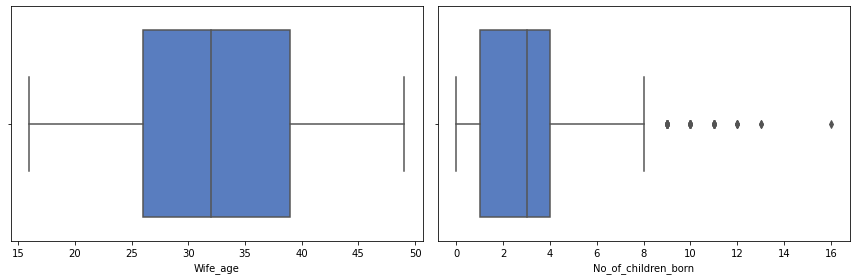

In [98]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(12,4))

sns.boxplot(data=data, x='Wife_age', ax=axes[0], palette='muted');
sns.boxplot(data=data, x='No_of_children_born',ax=axes[1], palette='muted');

plt.tight_layout()


In [99]:
data.columns

Index(['Wife_age', 'Wife_ education', 'Husband_education',
       'No_of_children_born', 'Wife_religion', 'Wife_Working',
       'Husband_Occupation', 'Standard_of_living_index', 'Media_exposure ',
       'Contraceptive_method_used'],
      dtype='object')

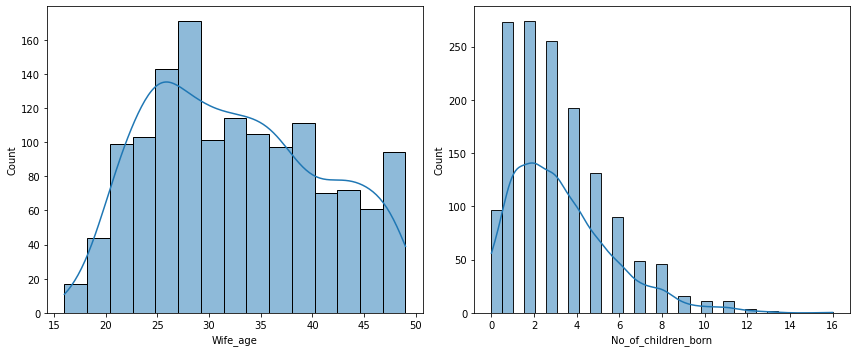

In [100]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(12,5))

sns.histplot(data=data, x='Wife_age', ax=axes[0], palette='muted',kde=True);
sns.histplot(data=data, x='No_of_children_born',ax=axes[1], palette='muted',kde=True);

plt.tight_layout()

We see the curves ovelapping for both classes. these variables are going to be poor predictors of the class.

In [101]:
data.columns

Index(['Wife_age', 'Wife_ education', 'Husband_education',
       'No_of_children_born', 'Wife_religion', 'Wife_Working',
       'Husband_Occupation', 'Standard_of_living_index', 'Media_exposure ',
       'Contraceptive_method_used'],
      dtype='object')

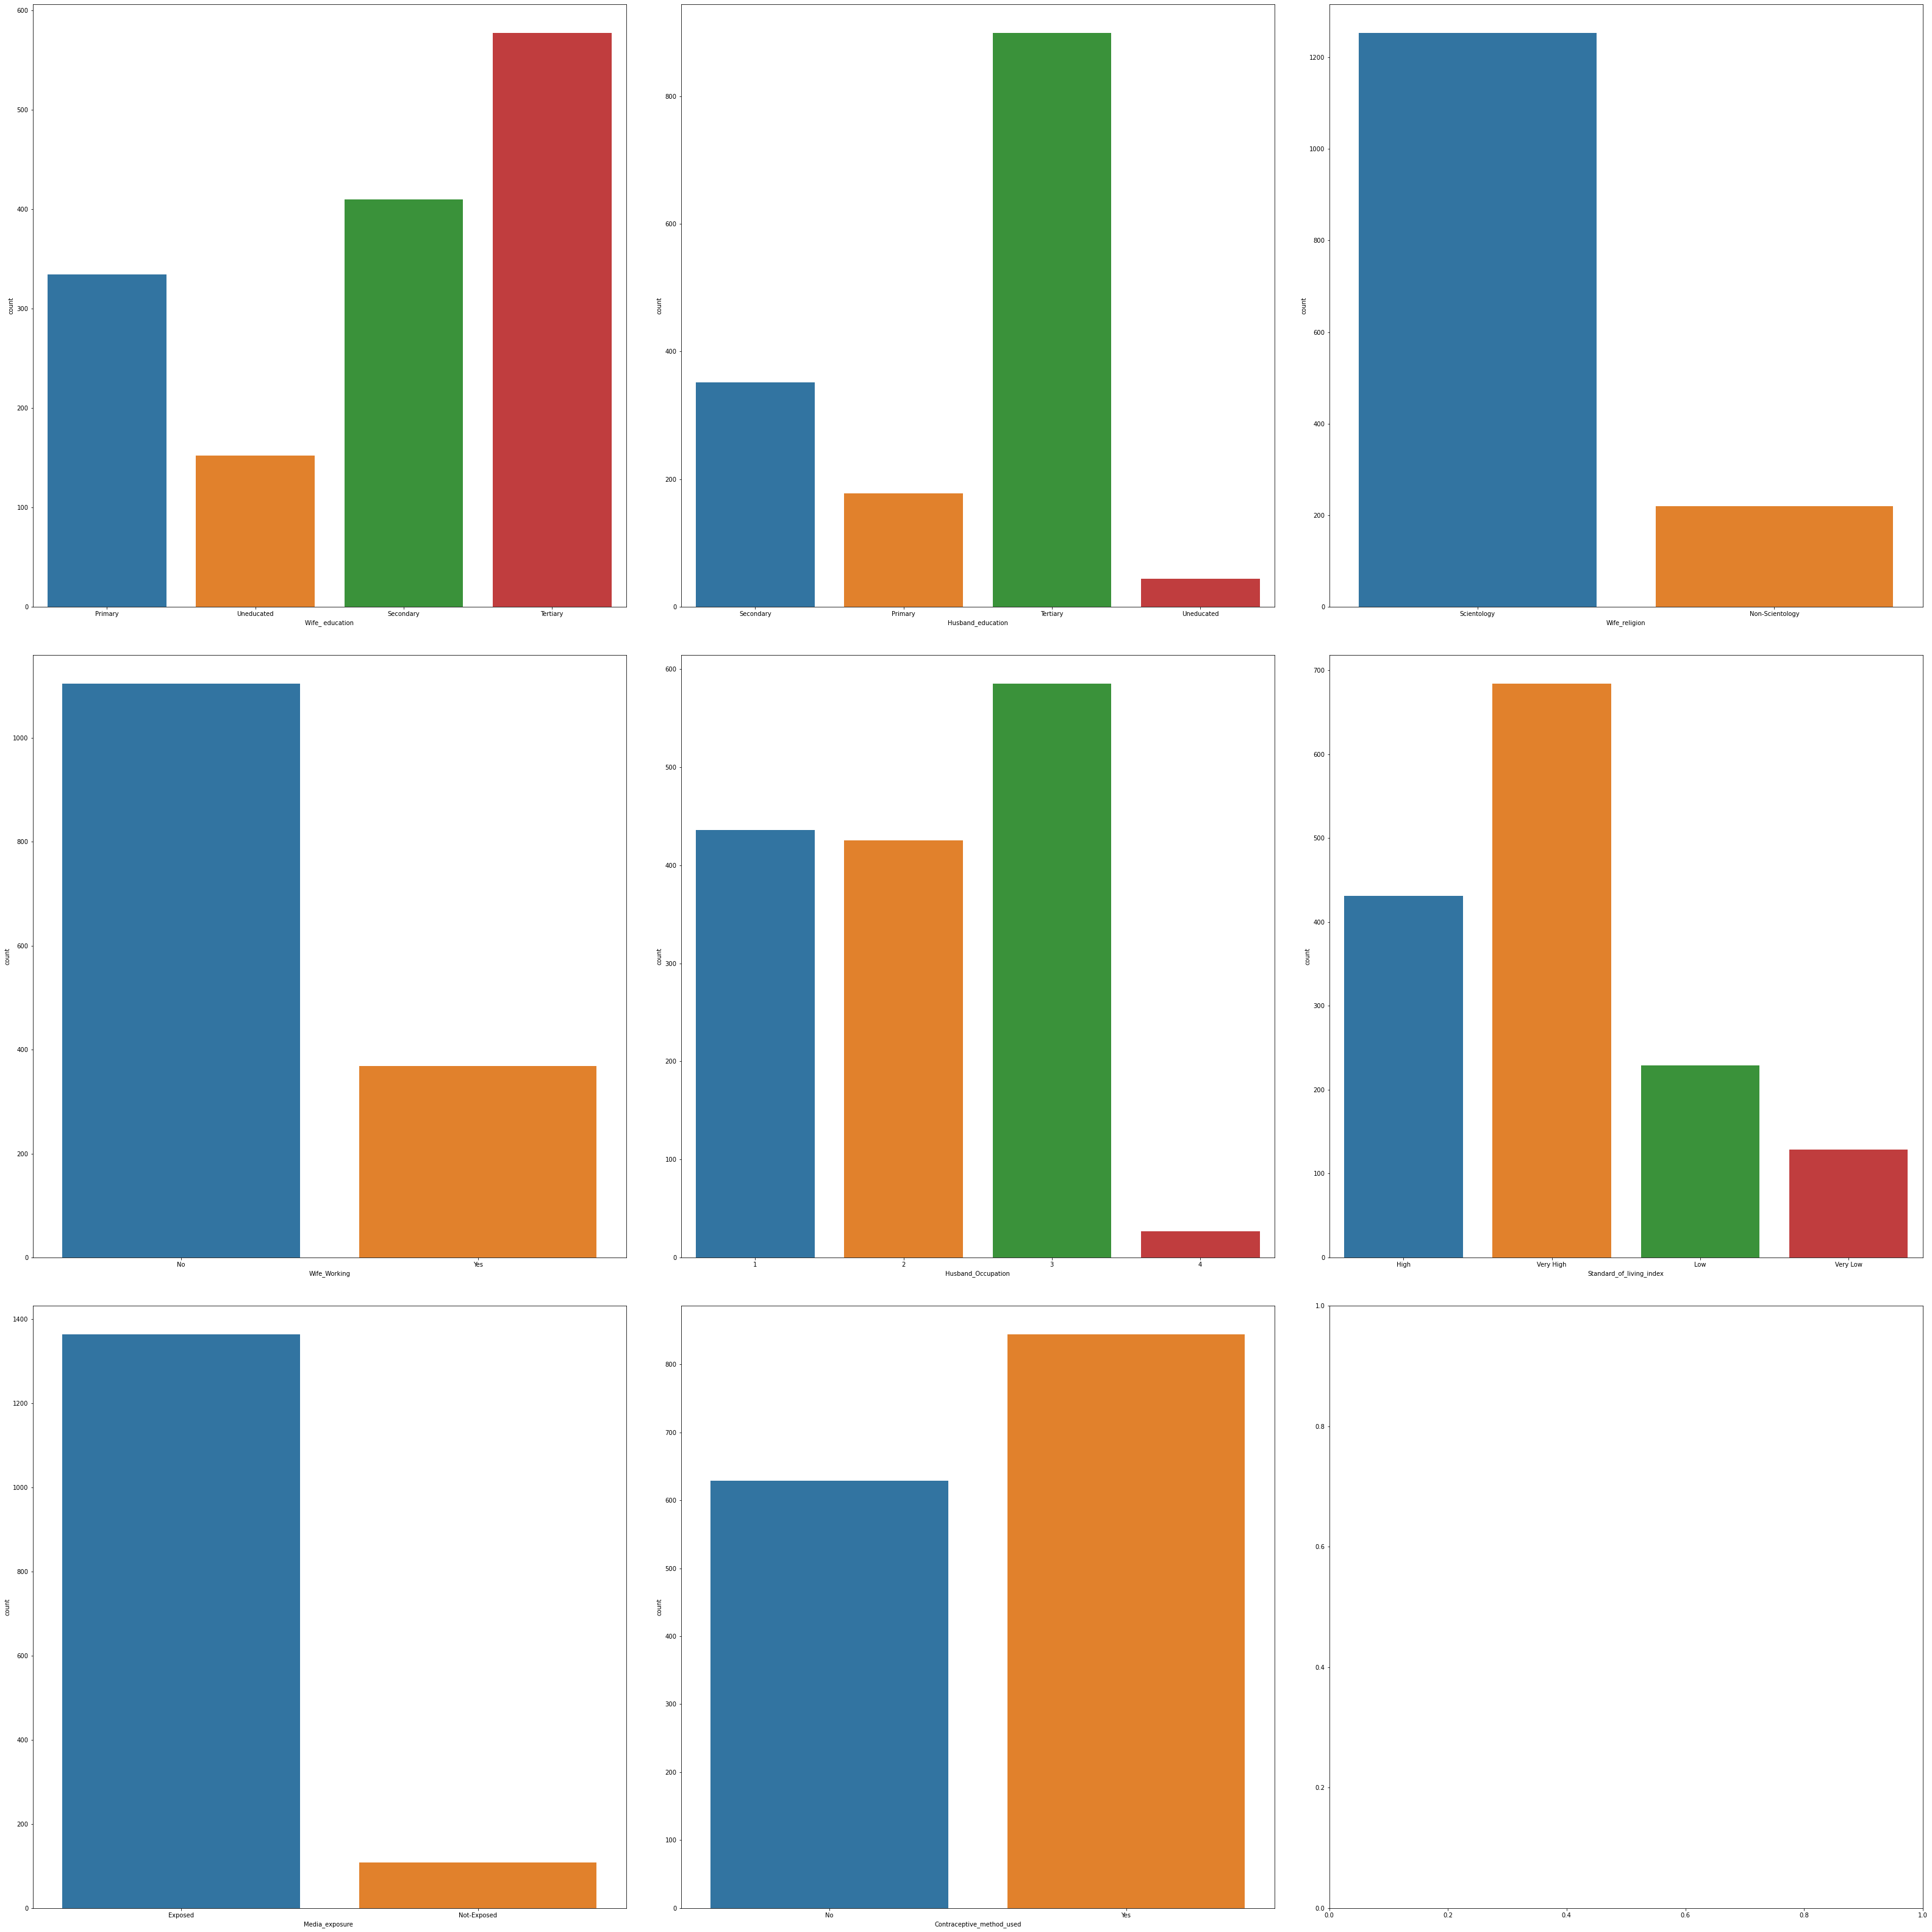

In [102]:
fig,axes=plt.subplots(nrows=3,ncols=3,figsize=(45,45))


sns.countplot(x=data['Wife_ education'],ax=axes[0][0])
sns.countplot(x=data['Husband_education'],ax=axes[0][1])
sns.countplot(x=data['Wife_religion'],ax=axes[0][2])
sns.countplot(x=data['Wife_Working'],ax=axes[1][0])
sns.countplot(x=data['Husband_Occupation'],ax=axes[1][1])
sns.countplot(x=data['Standard_of_living_index'],ax=axes[1][2])
sns.countplot(x=data['Media_exposure '],ax=axes[2][0])
sns.countplot(x=data['Contraceptive_method_used'],ax=axes[2][1])

plt.rc('font',size=40)
plt.tight_layout()

## Bivariate Analysis

In [103]:
data.columns

Index(['Wife_age', 'Wife_ education', 'Husband_education',
       'No_of_children_born', 'Wife_religion', 'Wife_Working',
       'Husband_Occupation', 'Standard_of_living_index', 'Media_exposure ',
       'Contraceptive_method_used'],
      dtype='object')

C:\Users\Admin\AppData\Local\Temp\ipykernel_6724\402462215.py:6: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


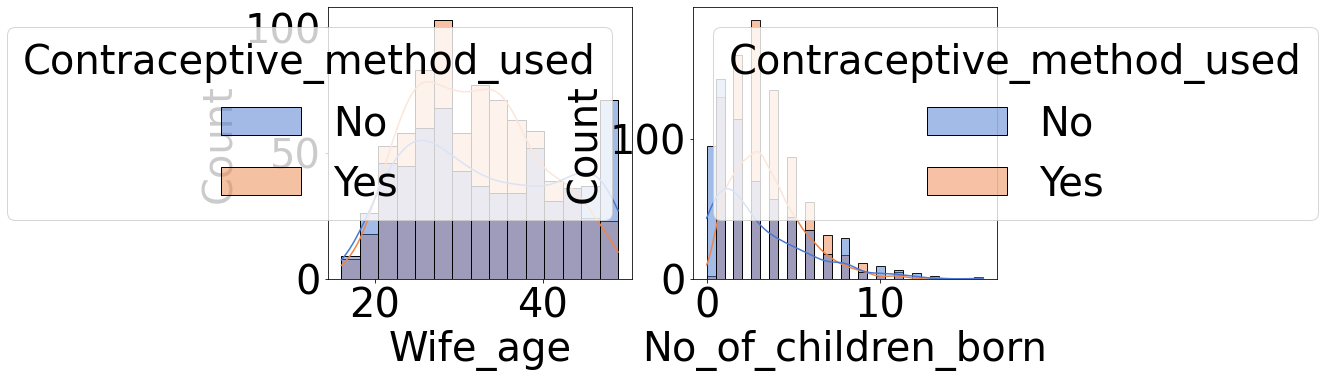

In [104]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(12,5))

sns.histplot(data=data, x='Wife_age', ax=axes[0], palette='muted',kde=True, hue='Contraceptive_method_used');
sns.histplot(data=data, x='No_of_children_born',ax=axes[1], palette='muted',kde=True, hue='Contraceptive_method_used');

plt.tight_layout()

### Continuous v/s continuous

<AxesSubplot:xlabel='Wife_age', ylabel='No_of_children_born'>

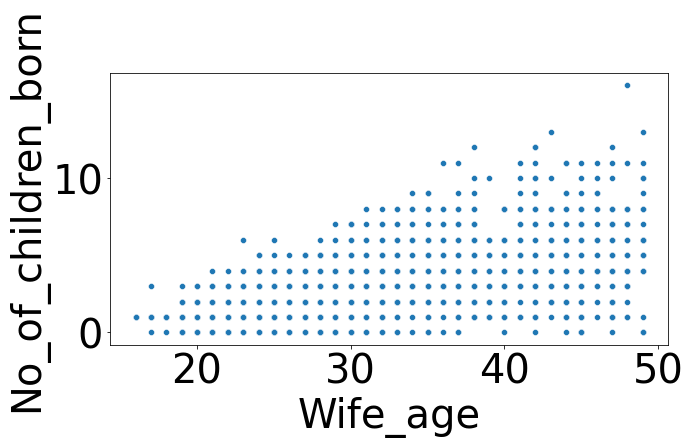

In [105]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=data, x='Wife_age',y='No_of_children_born')


### Categorical v/s continuous

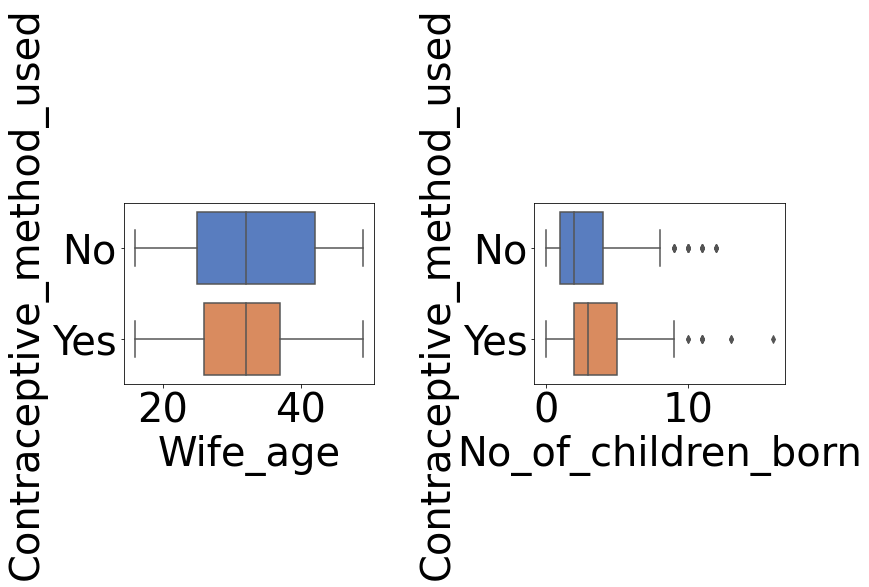

In [106]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(12,5))

sns.boxplot(data=data, x='Wife_age', y='Contraceptive_method_used',ax=axes[0], palette='muted');
sns.boxplot(data=data, x='No_of_children_born',y='Contraceptive_method_used',ax=axes[1], palette='muted');

plt.tight_layout()

### Categorical v/s categorical

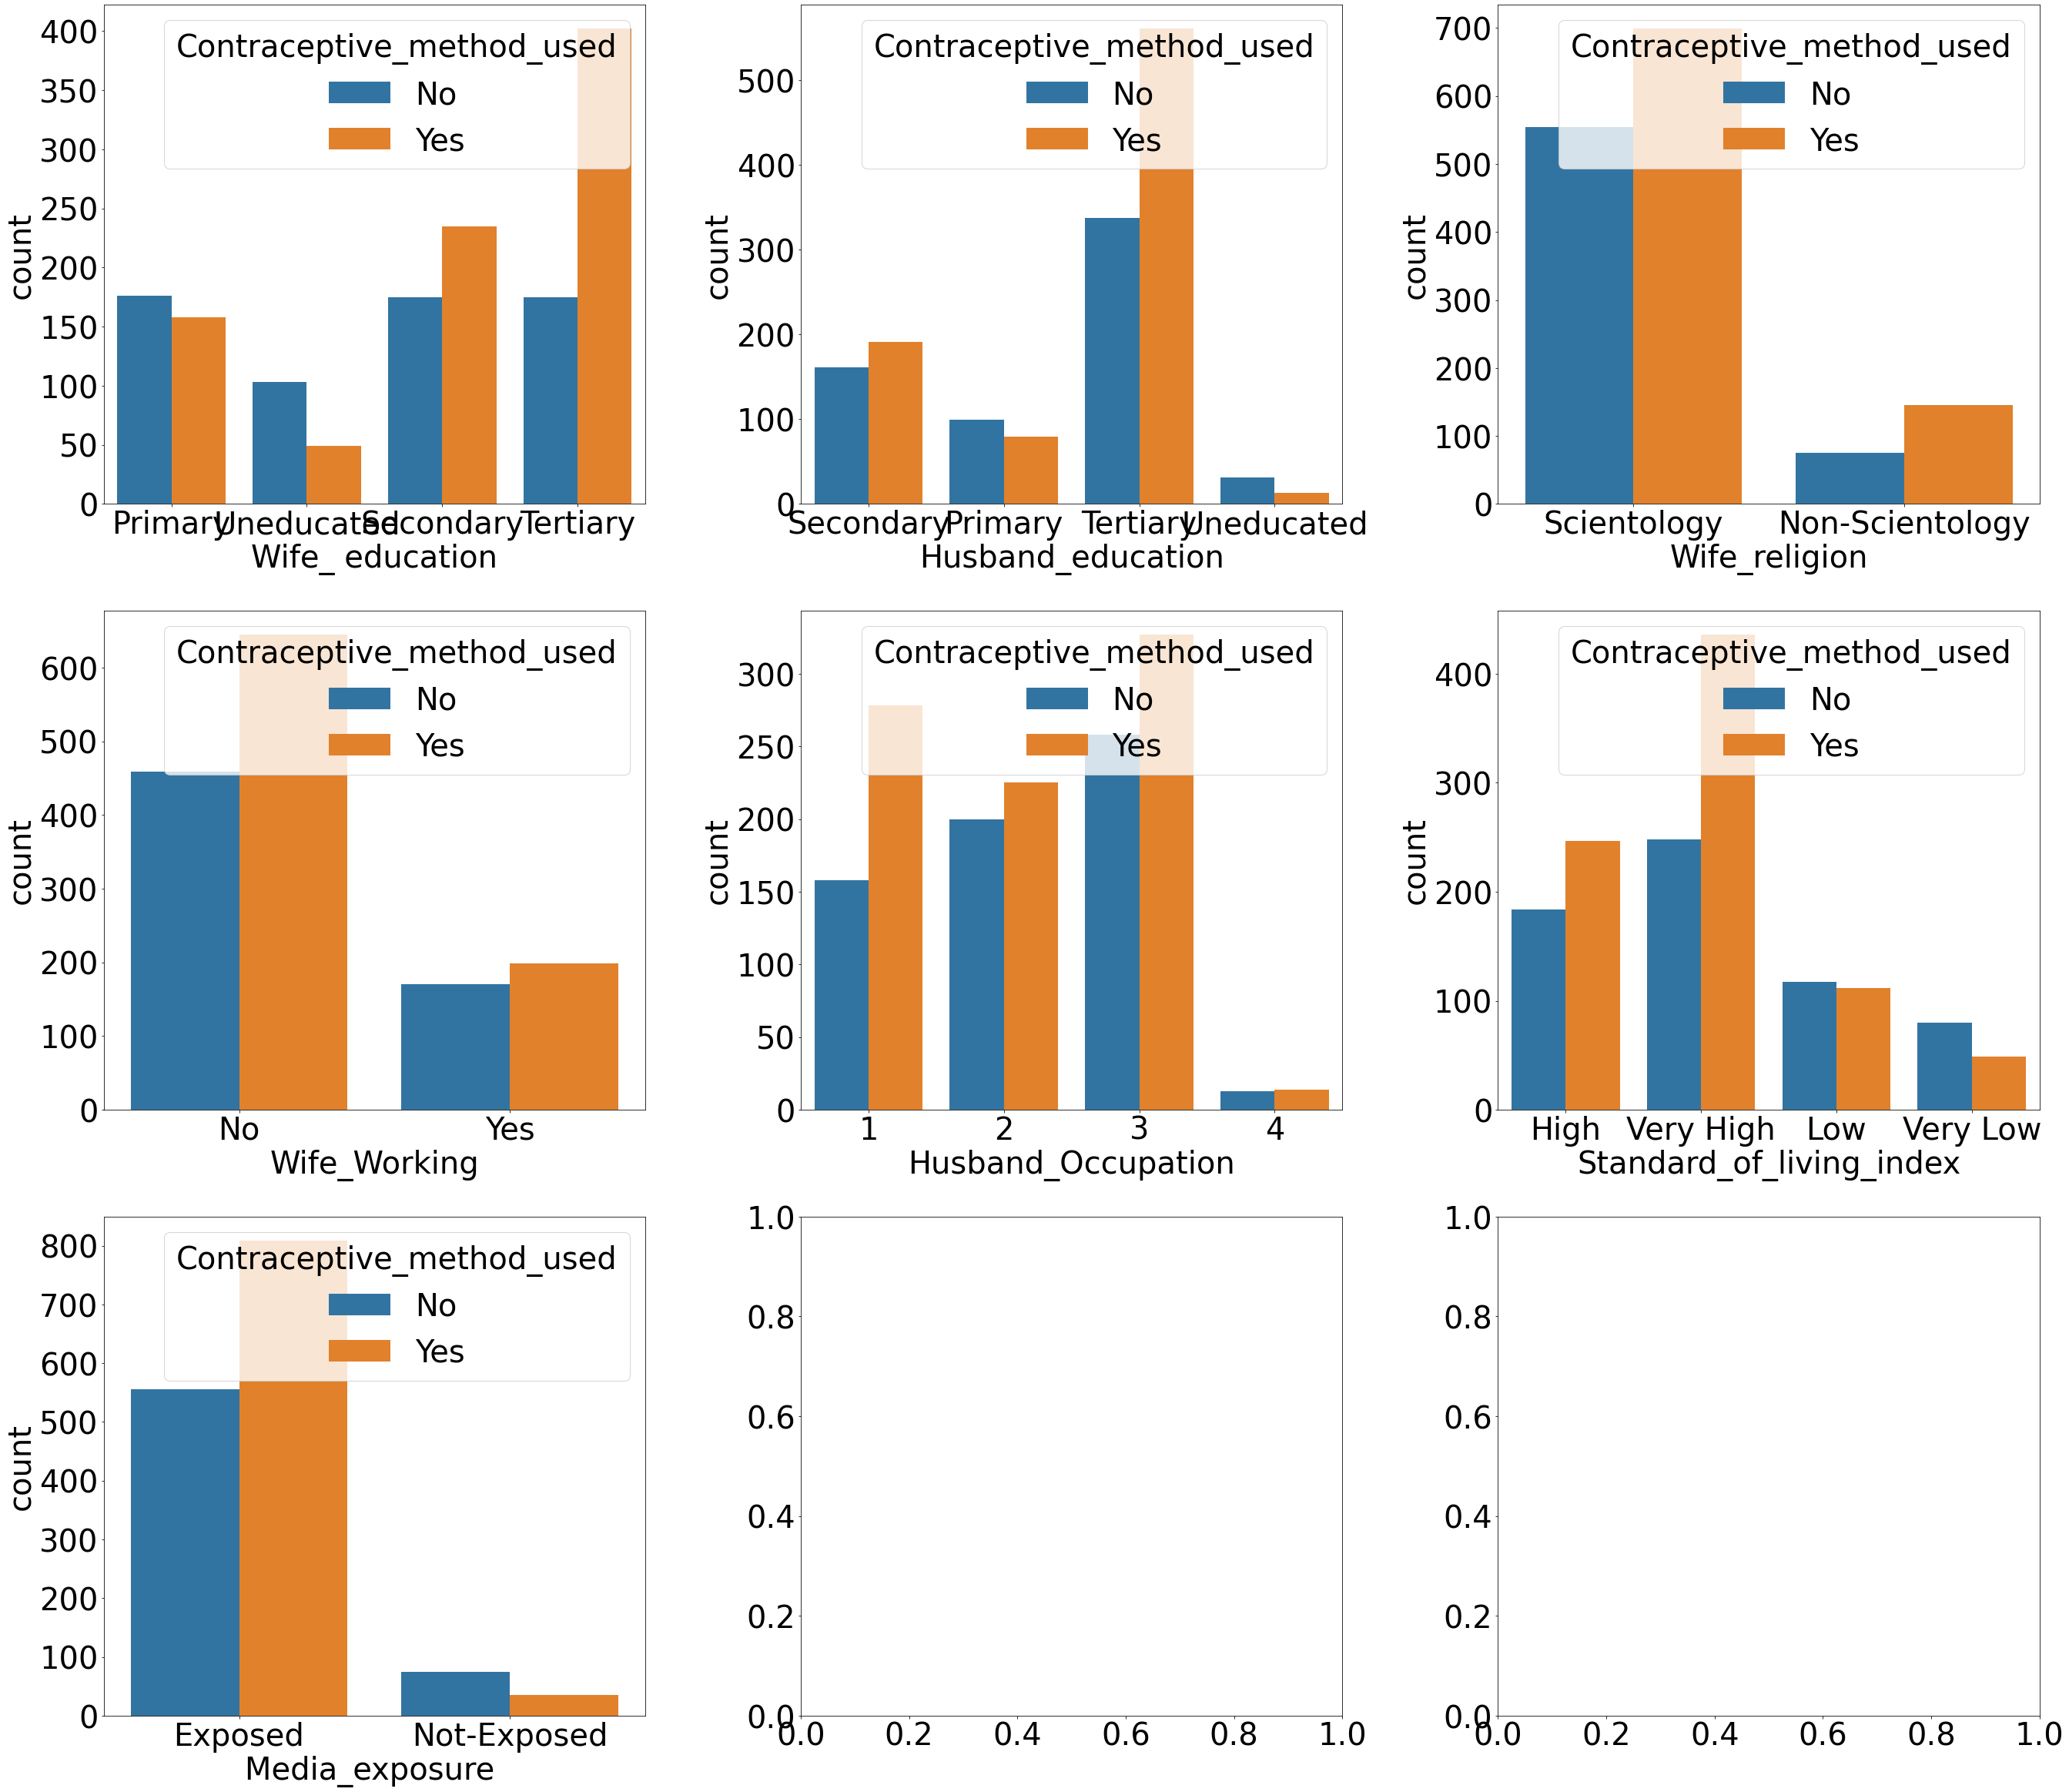

In [107]:
fig,axes=plt.subplots(nrows=3,ncols=3,figsize=(38,33))

sns.countplot(x=data['Wife_ education'],ax=axes[0][0],hue=data['Contraceptive_method_used'])
sns.countplot(x=data['Husband_education'],ax=axes[0][1],hue=data['Contraceptive_method_used'])
sns.countplot(x=data['Wife_religion'],ax=axes[0][2],hue=data['Contraceptive_method_used'])
sns.countplot(x=data['Wife_Working'],ax=axes[1][0],hue=data['Contraceptive_method_used'])
sns.countplot(x=data['Husband_Occupation'],ax=axes[1][1],hue=data['Contraceptive_method_used'])
sns.countplot(x=data['Standard_of_living_index'],ax=axes[1][2],hue=data['Contraceptive_method_used'])
sns.countplot(x=data['Media_exposure '],ax=axes[2][0],hue=data['Contraceptive_method_used'])

plt.rc('font',size=29)
plt.tight_layout()

## Multi variate analysis

In [108]:
data.columns

Index(['Wife_age', 'Wife_ education', 'Husband_education',
       'No_of_children_born', 'Wife_religion', 'Wife_Working',
       'Husband_Occupation', 'Standard_of_living_index', 'Media_exposure ',
       'Contraceptive_method_used'],
      dtype='object')

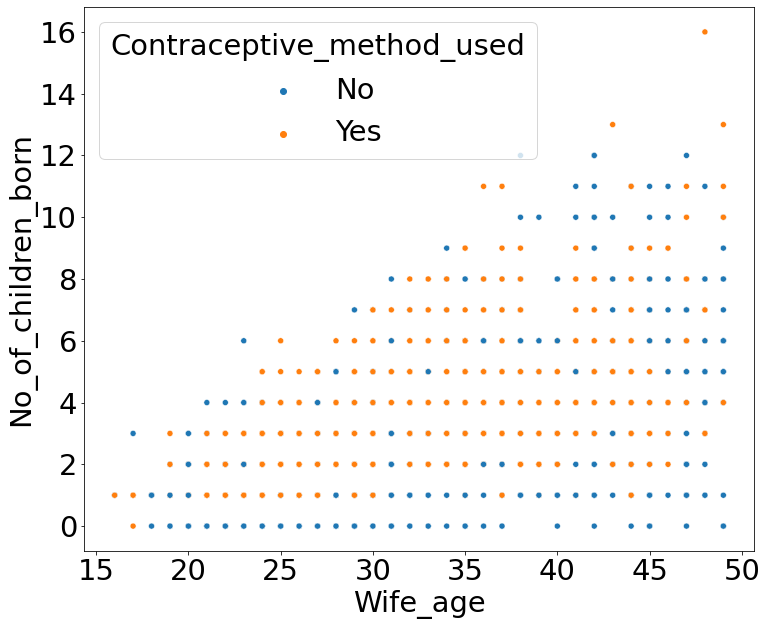

In [109]:
plt.figure(figsize=(12,10))
sns.scatterplot(data=data, x='Wife_age',y='No_of_children_born',hue='Contraceptive_method_used')
plt.rc('font',size=7)

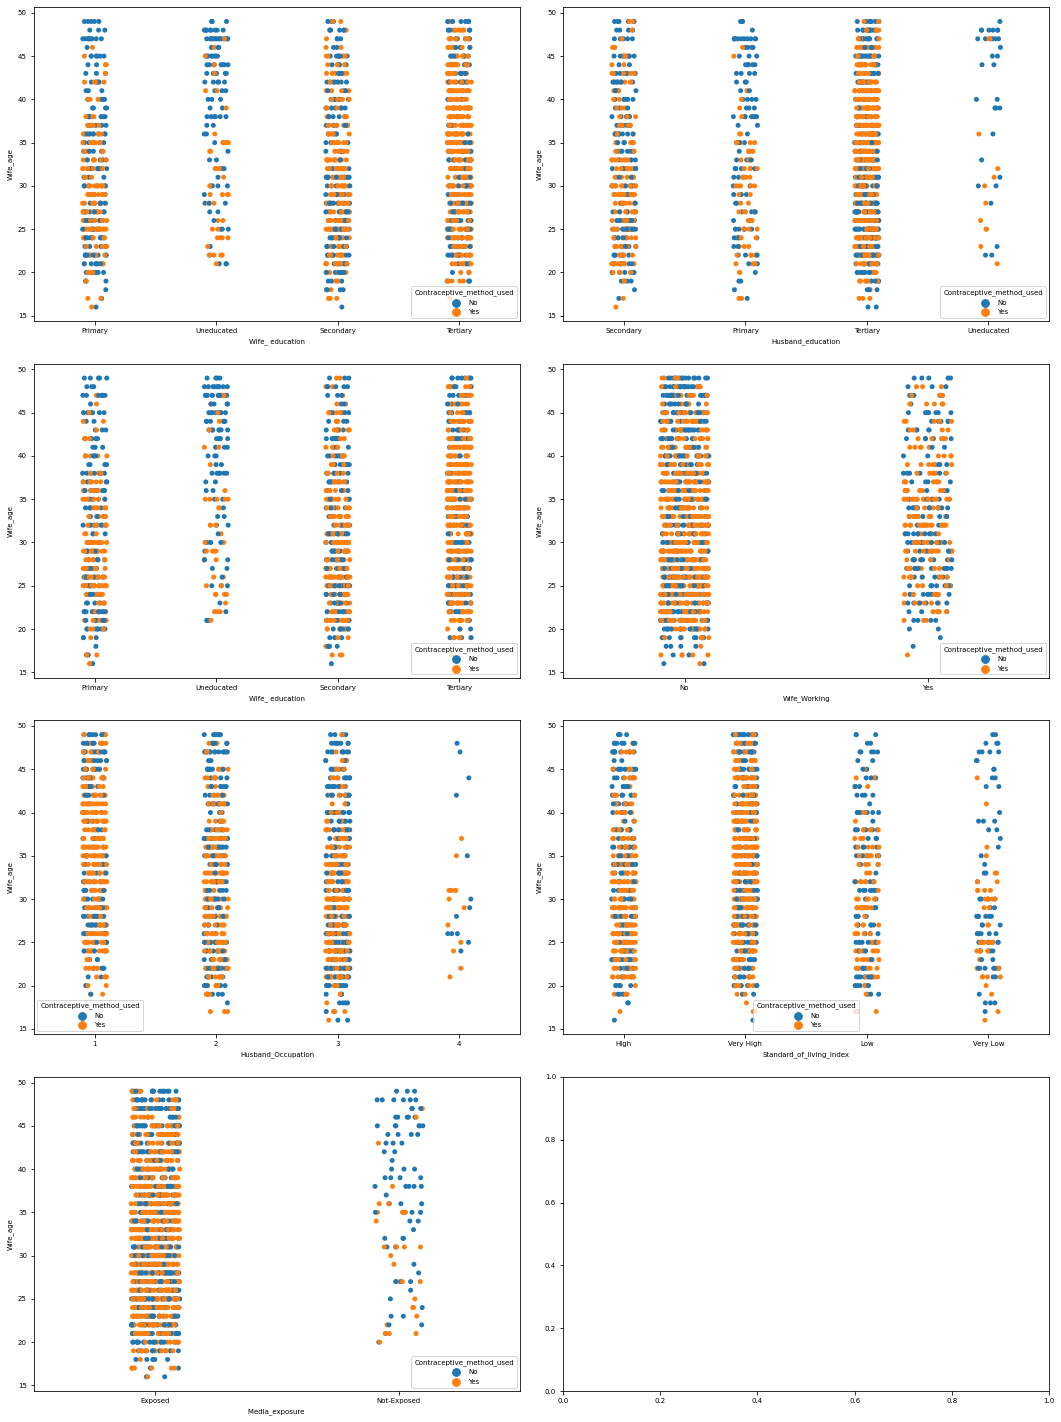

In [110]:
fig,axes=plt.subplots(nrows=4,ncols=2,figsize=(15,20))

sns.stripplot(y=data['Wife_age'],x=data['Wife_ education'],ax=axes[0][0],hue=data['Contraceptive_method_used'])
sns.stripplot(y=data['Wife_age'],ax=axes[0][1],hue=data['Contraceptive_method_used'],x=data['Husband_education'])
sns.stripplot(y=data['Wife_age'],ax=axes[1][0],hue=data['Contraceptive_method_used'],x=data['Wife_ education'])
sns.stripplot(y=data['Wife_age'],ax=axes[1][1],hue=data['Contraceptive_method_used'],x=data['Wife_Working'])
sns.stripplot(y=data['Wife_age'],ax=axes[2][0],hue=data['Contraceptive_method_used'],x=data['Husband_Occupation'])
sns.stripplot(y=data['Wife_age'],ax=axes[2][1],hue=data['Contraceptive_method_used'],x=data['Standard_of_living_index'])
sns.stripplot(y=data['Wife_age'],ax=axes[3][0],hue=data['Contraceptive_method_used'],x=data['Media_exposure '])

plt.rc('font',size=15)
plt.tight_layout()

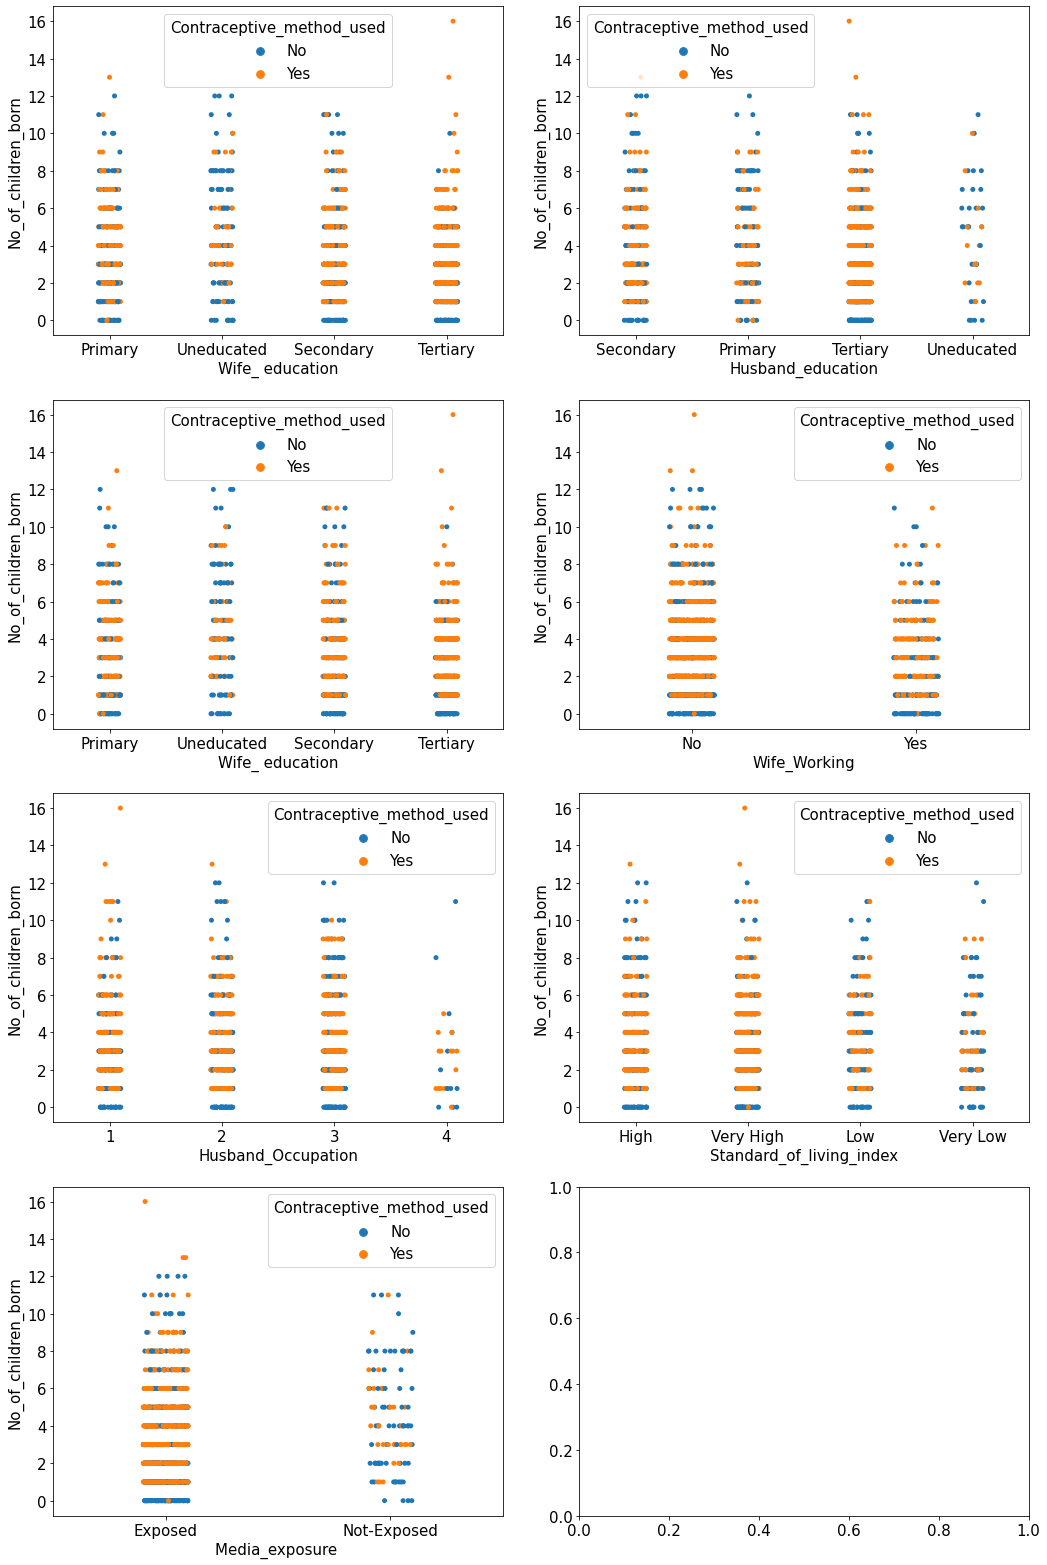

In [111]:
fig,axes=plt.subplots(nrows=4,ncols=2,figsize=(15,22))

sns.stripplot(y=data['No_of_children_born'],x=data['Wife_ education'],ax=axes[0][0],hue=data['Contraceptive_method_used'])
sns.stripplot(y=data['No_of_children_born'],ax=axes[0][1],hue=data['Contraceptive_method_used'],x=data['Husband_education'])
sns.stripplot(y=data['No_of_children_born'],ax=axes[1][0],hue=data['Contraceptive_method_used'],x=data['Wife_ education'])
sns.stripplot(y=data['No_of_children_born'],ax=axes[1][1],hue=data['Contraceptive_method_used'],x=data['Wife_Working'])
sns.stripplot(y=data['No_of_children_born'],ax=axes[2][0],hue=data['Contraceptive_method_used'],x=data['Husband_Occupation'])
sns.stripplot(y=data['No_of_children_born'],ax=axes[2][1],hue=data['Contraceptive_method_used'],x=data['Standard_of_living_index'])
sns.stripplot(y=data['No_of_children_born'],ax=axes[3][0],hue=data['Contraceptive_method_used'],x=data['Media_exposure '])

plt.rc('font',size=15)
plt.tight_layout()

### Null value Imputation

In [112]:
a=data['Wife_age'].median()
b=data['No_of_children_born'].median()
data['Wife_age'].replace(np.nan, a, inplace=True)
data['No_of_children_born'].replace(np.nan, b, inplace=True)

## 2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis) and CART.

## 2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: Compare Both the models and write inference which model is best/optimized.

In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1473 non-null   float64
 1   Wife_ education            1473 non-null   object 
 2   Husband_education          1473 non-null   object 
 3   No_of_children_born        1473 non-null   float64
 4   Wife_religion              1473 non-null   object 
 5   Wife_Working               1473 non-null   object 
 6   Husband_Occupation         1473 non-null   object 
 7   Standard_of_living_index   1473 non-null   object 
 8   Media_exposure             1473 non-null   object 
 9   Contraceptive_method_used  1473 non-null   object 
dtypes: float64(2), object(8)
memory usage: 115.2+ KB


In [114]:
data['Wife_Working'].value_counts()

No     1104
Yes     369
Name: Wife_Working, dtype: int64

### Encoding the data

In [115]:
data['Wife_ education']=np.where(data['Wife_ education'] == 'Tertiary', '4', data['Wife_ education'])
data['Wife_ education']=np.where(data['Wife_ education'] == 'Secondary', '3', data['Wife_ education'])
data['Wife_ education']=np.where(data['Wife_ education'] == 'Primary', '2', data['Wife_ education'])
data['Wife_ education']=np.where(data['Wife_ education'] == 'Uneducated', '1', data['Wife_ education'])


data['Husband_education']=np.where(data['Husband_education'] == 'Tertiary', '4', data['Husband_education'])
data['Husband_education']=np.where(data['Husband_education'] == 'Secondary', '3', data['Husband_education'])
data['Husband_education']=np.where(data['Husband_education'] == 'Primary', '2', data['Husband_education'])
data['Husband_education']=np.where(data['Husband_education'] == 'Uneducated', '1', data['Husband_education'])



data['Contraceptive_method_used']=np.where(data['Contraceptive_method_used'] == 'Yes', '1', data['Contraceptive_method_used'])
data['Contraceptive_method_used']=np.where(data['Contraceptive_method_used'] == 'No', '0', data['Contraceptive_method_used'])


data['Standard_of_living_index']=np.where(data['Standard_of_living_index'] == 'Very High', '4', data['Standard_of_living_index'])
data['Standard_of_living_index']=np.where(data['Standard_of_living_index'] == 'High', '3', data['Standard_of_living_index'])
data['Standard_of_living_index']=np.where(data['Standard_of_living_index'] == 'Low', '2', data['Standard_of_living_index'])
data['Standard_of_living_index']=np.where(data['Standard_of_living_index'] == 'Very Low', '1', data['Standard_of_living_index'])

#Since media exposure is mentioned to be good and not good, we consider this as ordinal variable and proceed with the encoding.
data['Media_exposure ']=np.where(data['Media_exposure '] == 'Exposed', '1', data['Media_exposure '])
data['Media_exposure ']=np.where(data['Media_exposure '] == 'Not-Exposed', '0', data['Media_exposure '])


data['Contraceptive_method_used']=np.where(data['Contraceptive_method_used'] == 'Yes', '1', data['Contraceptive_method_used'])
data['Contraceptive_method_used']=np.where(data['Contraceptive_method_used'] == 'No', '0', data['Contraceptive_method_used'])

We will use one hot encoding for wife religion and wife working because they are nominal variables. Since these columns are binary, the one hot encoding will not increase the dimantionality as well.  

In [116]:
data.columns

Index(['Wife_age', 'Wife_ education', 'Husband_education',
       'No_of_children_born', 'Wife_religion', 'Wife_Working',
       'Husband_Occupation', 'Standard_of_living_index', 'Media_exposure ',
       'Contraceptive_method_used'],
      dtype='object')

In [117]:
data = pd.get_dummies(data, columns=['Wife_religion','Wife_Working'],drop_first=True)

In [118]:
data.select_dtypes('object')

Wife_ education Husband_education Husband_Occupation  \
0                  2                 3                  2   
1                  1                 3                  3   
2                  2                 3                  3   
3                  3                 2                  3   
4                  3                 3                  3   
...              ...               ...                ...   
1468               4                 4                  2   
1469               4                 4                  1   
1470               3                 3                  1   
1471               3                 3                  2   
1472               3                 3                  2   

     Standard_of_living_index Media_exposure  Contraceptive_method_used  
0                           3               1                         0  
1                           4               1                         0  
2                           4               1                         0  
3                           3               1                         0  
4                           2               1                         0  
...                       ...             ...                       ...  
1468                        4               1                         1  
1469                        4               1                         1  
1470                        4               1                         1  
1471                        2               1                         1  
1472                        4               1                         1  

[1473 rows x 6 columns]

In [119]:
for col in data.select_dtypes('object').columns:
    data[col]=data[col].astype('int')

In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1473 non-null   float64
 1   Wife_ education            1473 non-null   int32  
 2   Husband_education          1473 non-null   int32  
 3   No_of_children_born        1473 non-null   float64
 4   Husband_Occupation         1473 non-null   int32  
 5   Standard_of_living_index   1473 non-null   int32  
 6   Media_exposure             1473 non-null   int32  
 7   Contraceptive_method_used  1473 non-null   int32  
 8   Wife_religion_Scientology  1473 non-null   uint8  
 9   Wife_Working_Yes           1473 non-null   uint8  
dtypes: float64(2), int32(6), uint8(2)
memory usage: 60.5 KB


### Separating dependent and independent variables

In [121]:
X=data.drop('Contraceptive_method_used',axis=1)
y=data['Contraceptive_method_used']

### Train- test split

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1,stratify=data['Contraceptive_method_used'])

In [123]:
X_train.shape

(1031, 9)

In [124]:
X_test.shape

(442, 9)

In [125]:
y_train.shape

(1031,)

In [126]:
y_test.shape

(442,)

<font color='blue'>

# Logistic Regression

In [127]:
model_log = LogisticRegression()
model_log.fit(X_train, y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Predicting on Training and Test dataset

In [128]:
ytrain_predict_log = model_log.predict(X_train)
ytest_predict_log = model_log.predict(X_test)

### Accuracy score

In [129]:
print('Accuracy of the model on Training data : ', model_log.score(X_train, y_train))
print('Accuracy of the model on Testing data : ', model_log.score(X_test, y_test))

Accuracy of the model on Training data :  0.6876818622696411
Accuracy of the model on Testing data :  0.6538461538461539


### Classification Report on Training and Test data:

In [130]:
print("Classification Report on Train Data\n")
print(classification_report(y_train, ytrain_predict_log))

Classification Report on Train Data

              precision    recall  f1-score   support

           0       0.68      0.50      0.58       440
           1       0.69      0.83      0.75       591

    accuracy                           0.69      1031
   macro avg       0.69      0.66      0.67      1031
weighted avg       0.69      0.69      0.68      1031



In [131]:
print("Classification Report on Test Data\n")
print(classification_report(y_test, ytest_predict_log))

Classification Report on Test Data

              precision    recall  f1-score   support

           0       0.63      0.46      0.53       189
           1       0.66      0.80      0.73       253

    accuracy                           0.65       442
   macro avg       0.65      0.63      0.63       442
weighted avg       0.65      0.65      0.64       442



### Confusion Matrix

In [132]:
confusion_matrix(y_train, ytrain_predict_log)

array([[221, 219],
       [103, 488]], dtype=int64)

In [133]:
confusion_matrix(y_test, ytest_predict_log)

array([[ 87, 102],
       [ 51, 202]], dtype=int64)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


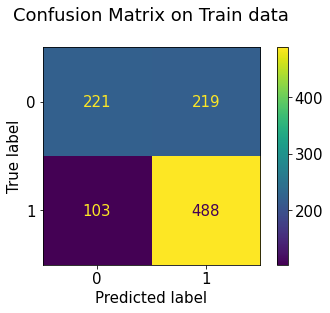

In [134]:
plot_confusion_matrix(model_log,X_train,y_train);
plt.title('Confusion Matrix on Train data\n');

plt.rc('font',size=20)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


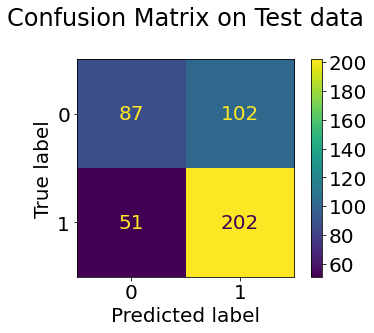

In [135]:
plot_confusion_matrix(model_log,X_test,y_test);
plt.title('Confusion Matrix on Test data\n');
plt.rc('font',size=10)

### ROC and AUC

#### Training Data

AUC of the training data: 0.714


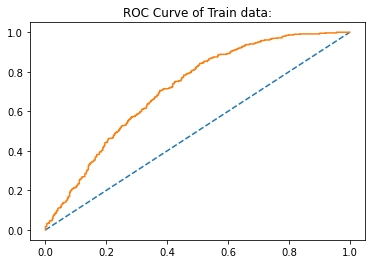

In [136]:
# predict probabilities
probs = model_log.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC of the training data: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC Curve of Train data:')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);


#### Testing data

AUC of the test data: 0.714


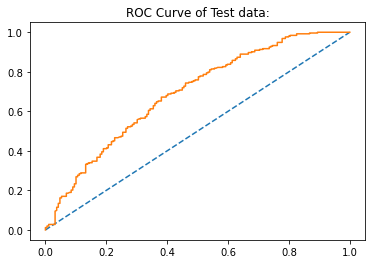

In [137]:
# predict probabilities
probs = model_log.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC of the test data: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.title('ROC Curve of Test data:')

plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

<font color='blue'>

# Linear Discriminant Analysis

In [140]:
lda = LinearDiscriminantAnalysis()
model_lda =lda.fit(X_train,y_train)

### Prediction on Train and test data

In [104]:
ytrain_predict_lda = model_lda.predict(X_train)
ytest_predict_lda = model_lda.predict(X_test)

### Accuracy Score

In [105]:
print('Accuracy of the model on Training data : ', model_lda.score(X_train, y_train))
print('Accuracy of the model on Testing data : ', model_lda.score(X_test, y_test))

Accuracy of the model on Training data :  0.6867119301648884
Accuracy of the model on Testing data :  0.6561085972850679


### Classification Report on Train and Test data:

In [106]:
print("Classification Report on Train Data\n")

print(classification_report(y_train, ytrain_predict_lda))

Classification Report on Train Data

              precision    recall  f1-score   support

           0       0.69      0.48      0.57       440
           1       0.69      0.84      0.75       591

    accuracy                           0.69      1031
   macro avg       0.69      0.66      0.66      1031
weighted avg       0.69      0.69      0.67      1031



In [107]:
print("Classification Report on Test Data\n")

print(classification_report(y_test, ytest_predict_lda))

Classification Report on Test Data

              precision    recall  f1-score   support

           0       0.64      0.45      0.53       189
           1       0.66      0.81      0.73       253

    accuracy                           0.66       442
   macro avg       0.65      0.63      0.63       442
weighted avg       0.65      0.66      0.64       442



### Confusion Matrix

In [108]:
confusion_matrix(y_train, ytrain_predict_lda)

array([[212, 228],
       [ 95, 496]], dtype=int64)

In [109]:
confusion_matrix(y_test, ytest_predict_lda)

array([[ 85, 104],
       [ 48, 205]], dtype=int64)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


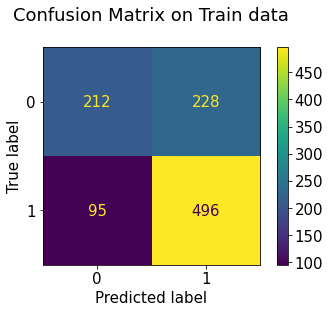

In [151]:
plot_confusion_matrix(model_lda,X_train,y_train);
plt.title('Confusion Matrix on Train data\n');
plt.rc('font',size=10)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


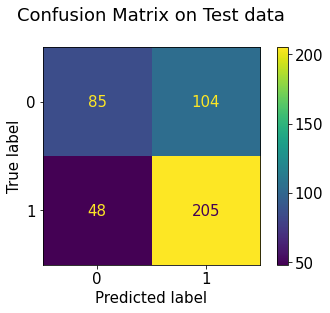

In [154]:
plot_confusion_matrix(model_lda,X_test,y_test);
plt.title('Confusion Matrix on Test data\n');
plt.rc('font',size=20)

### ROC and AUC

#### Training data

AUC of the training data: 0.714


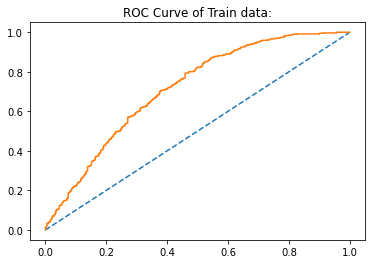

In [140]:
# predict probabilities
probs = model_lda.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC of the training data: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.title('ROC Curve of Train data:')

plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

#### Test data

AUC of the test data: 0.714


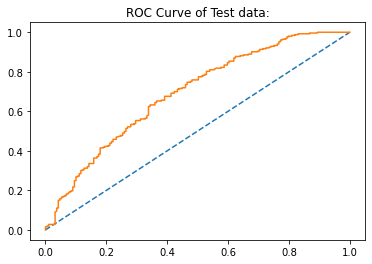

In [141]:
# predict probabilities
probs = model_lda.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC of the test data: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.title('ROC Curve of Test data:')

plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [114]:
data.shape

(1473, 10)

<font color = blue>
    
# Classification and Regression Tree (CART)

In [181]:
# Initialise a Decision Tree Classifier
model_dt = DecisionTreeClassifier(criterion = 'gini', random_state=1,  max_depth = 7, min_samples_leaf=15,min_samples_split=45) #1% of the data in min sample leaf and 3 times of it in min sample split
# Fit the model
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=15, min_samples_split=45,
                       random_state=1)

### Prediction on Train and test data

In [182]:
ytrain_predict_dt = model_dt.predict(X_train)
ytest_predict_dt = model_dt.predict(X_test)

### Accuracy Score

In [183]:
print('Accuracy of the model on Training data : ', model_dt.score(X_train, y_train))
print('Accuracy of the model on Testing data : ', model_dt.score(X_test, y_test))

Accuracy of the model on Training data :  0.7507274490785645
Accuracy of the model on Testing data :  0.6719457013574661


### Classification Report on Train and Test data:

In [184]:
print("Classification Report on Train Data\n")
print(classification_report(y_train, ytrain_predict_dt))

Classification Report on Train Data

              precision    recall  f1-score   support

           0       0.81      0.55      0.65       440
           1       0.73      0.90      0.81       591

    accuracy                           0.75      1031
   macro avg       0.77      0.72      0.73      1031
weighted avg       0.76      0.75      0.74      1031



In [185]:
print("Classification Report on Test Data\n")
print(classification_report(y_test, ytest_predict_dt))

Classification Report on Test Data

              precision    recall  f1-score   support

           0       0.70      0.41      0.52       189
           1       0.66      0.87      0.75       253

    accuracy                           0.67       442
   macro avg       0.68      0.64      0.63       442
weighted avg       0.68      0.67      0.65       442



### Confusion Matrix

In [186]:
confusion_matrix(y_train, ytrain_predict_dt)

array([[241, 199],
       [ 58, 533]], dtype=int64)

In [187]:
confusion_matrix(y_test, ytest_predict_dt)

array([[ 78, 111],
       [ 34, 219]], dtype=int64)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


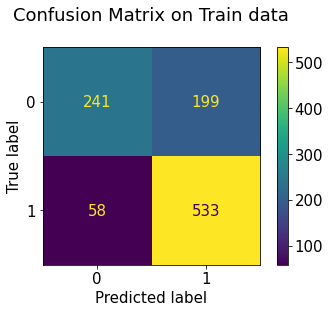

In [204]:
plot_confusion_matrix(model_dt,X_train,y_train);
plt.title('Confusion Matrix on Train data\n');
plt.rc('font',size=10)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


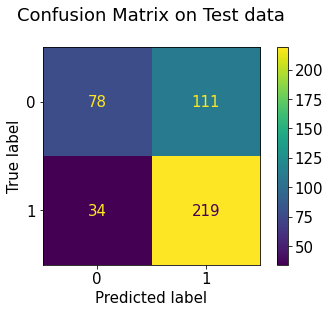

In [212]:
plot_confusion_matrix(model_dt,X_test,y_test);
plt.title('Confusion Matrix on Test data\n');
plt.rc('font',size=10)

### ROC and AUC

#### Training data

AUC of the training data: 0.816


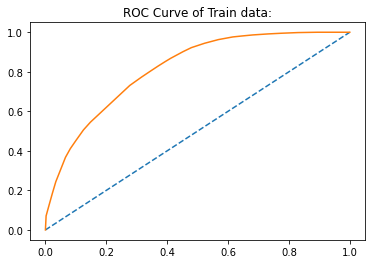

In [214]:
# predict probabilities
probs = model_dt.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC of the training data: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.title('ROC Curve of Train data:')

plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);
plt.rc('font',size=12)

#### Test data

AUC of the test data: 0.816


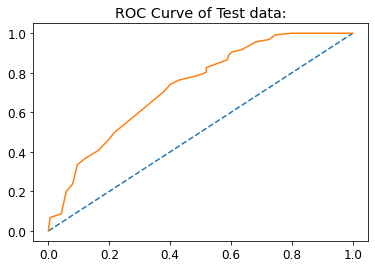

In [215]:
# predict probabilities
probs = model_dt.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC of the test data: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.title('ROC Curve of Test data:')

plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);
plt.rc('font',size=12)

In [192]:
# MAKE DECISION TREE FIGURE

In [193]:
y.value_counts(normalize=True)*100

1    57.298031
0    42.701969
Name: Contraceptive_method_used, dtype: float64

In [194]:
import os
os.getcwd()

'C:\\Users\\Admin\\Downloads\\GL\\5. Predictive Modelling\\Project - PM'

In [195]:
from sklearn import tree

train_char_label = ['No', 'Yes']
df_Tree_File = open('C:\\Users\\Admin\\Downloads\\GL\\5. Predictive Modelling\\Project - PM\df_Tree_File.dot','w')
dot_data = tree.export_graphviz(model_dt, 
                                out_file=df_Tree_File, 
                                feature_names = list(X_train), 
                                class_names = list(train_char_label))

df_Tree_File.close()